In [1]:
%cd ../../
%load_ext autoreload
%autoreload 2

e:\Mare5\Documents\Šola\IŠRM\ds-smart-lights


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pprint
from src.v1.experiments import *
from src.evaluate import default_evaluation_metrics

# tempc Experiments

In [3]:
# Evaluation output settings
metrics = [m for m in default_evaluation_metrics if m[0] in ['MSE', 'MedAE']]
summary_params = dict(
    include_support = True,
    include_standard_error=True,
    include_confidence_intervals=True,
    include_device_src = True,
    include_device_uncertainty=False,
    count_error_thresholds=[1,3,5],
    metrics=metrics,
)
summary_params_ = summary_params.copy()
summary_params_.update(dict(
    include_device_src=False, 
    include_support=False, 
    return_fold_summaries=False,
    include_confidence_intervals=False,
    count_errors_threshold=[],
))
pd.set_option('display.max_columns', 128)

In [4]:
def pretty_loss_summary(df):
    summary = {}
    for loss, _ in metrics:
        summary[loss] = '$' + df[f'{loss}_Loss'].map('{:.3f}'.format) + ' \\pm ' + df[f'{loss}_SE'].map('{:.3f}'.format) + '$'
    df = pd.DataFrame(summary)
    return df

def pretty_thresholds_summary(df):
    summary = {}
    for i in [1,3,5]:
        summary[f'$< {i}$ °C'] = '$' + (1 - df[f'n_thresh_error_{i}_Loss']).map('{:.3f}'.format) + ' \\pm ' + df[f'n_thresh_error_{i}_SE'].map('{:.3f}'.format) + '$'
    df = pd.DataFrame(summary)
    return df

def pretty_summary_2(df):
    summary = {}
    for loss, _ in metrics:
        summary[loss] = '$' + df[f'{loss}_Loss'].map('{:.3f}'.format) + ' \\pm ' + df[f'{loss}_SE'].map('{:.3f}'.format) + '$'
    for i in summary_params['count_error_thresholds']:
        summary[f'$< {i}$ °C'] = '$' + (1 - df[f'n_thresh_error_{i}_Loss']).map('{:.3f}'.format) + '$'
    df = pd.DataFrame(summary)
    return df

def rows_to_columns(df):
    new = []
    for row in df.iterrows():
        new.append(row[1].add_prefix(f'{row[0]}_'))
    return pd.concat(new, axis=0)

def run_experiment(e):
    print('================')
    print(f'{e.name()}: {e.__doc__}')
    print('===Parameters==')
    pprint.pprint(e.get_params())
    print('================')
    folds, summary = e.evaluate(**summary_params)
    print("===Fold mean====")
    print(folds.drop(folds.filter(regex='_CI_|_SE').columns, axis=1).filter(regex='|'.join(summary.index.to_list()), axis=1).mean())
    print("===All folds====")
    print(summary)
    print('================', flush=True)
    return folds, summary

In [8]:
# Generate latex table for report
print(pretty_loss_summary(df).to_latex(escape=False))
print(pretty_thresholds_summary(df).to_latex(escape=False))
print(pretty_summary_2(df).to_latex(escape=False))

\begin{tabular}{lll}
\toprule
{} &                 MSE &              MedAE \\
\midrule
RidgeExperimentV4          &   $4.163 \pm 0.016$ &  $1.214 \pm 0.003$ \\
RidgeExperimentV3          &   $5.048 \pm 0.075$ &  $1.320 \pm 0.003$ \\
RollingMeanOffsetE         &   $5.938 \pm 0.015$ &  $1.697 \pm 0.003$ \\
RidgeExperimentV5          &   $5.963 \pm 0.020$ &  $1.602 \pm 0.004$ \\
RidgeExperimentV1          &   $6.692 \pm 0.061$ &  $1.769 \pm 0.004$ \\
RidgeExperimentV2          &   $6.692 \pm 0.061$ &  $1.769 \pm 0.004$ \\
MeanOffsetExperiment       &   $7.891 \pm 0.027$ &  $1.797 \pm 0.004$ \\
RF_AllVariablesE           &   $8.547 \pm 0.031$ &  $1.672 \pm 0.004$ \\
RFExperimentV5             &   $9.134 \pm 0.030$ &  $1.810 \pm 0.005$ \\
RollingTempcMeanE          &   $9.262 \pm 0.028$ &  $1.853 \pm 0.007$ \\
LastKTempcMeanE            &  $10.362 \pm 0.034$ &  $1.916 \pm 0.007$ \\
RecentDeviceTempcMeanE     &  $10.511 \pm 0.033$ &  $1.919 \pm 0.007$ \\
RFExperimentV4             &  $10.55

## All experiments summary

In [5]:
params = {
    'device_serials': cfg.device_ids,
    'verbose': False,
}
print(params)
df = { }
for e in ALL_EXPERIMENTS:
    e = e(**params)
    r = e.evaluate(**summary_params_)
    # r = r.mean(numeric_only=True)
    # r = pretty_compact_summary(r)
    r = rows_to_columns(r)
    df[e.name()] = r.to_dict()
df = pd.DataFrame(df).transpose()
df = df.sort_values(by='MSE_Loss')
df.round(3)

{'device_serials': [8, 1, 9, 11, 10, 3, 7, 5, 12, 13], 'verbose': False}


,MSE_Loss,MSE_SE,MedAE_Loss,MedAE_SE,n_thresh_error_1_Loss,n_thresh_error_1_SE,n_thresh_error_3_Loss,n_thresh_error_3_SE,n_thresh_error_5_Loss,n_thresh_error_5_SE
RidgeExperimentV4,4.162,0.016,1.214,0.003,0.586,0.001,0.123,0.001,0.026,0.000
RidgeExperimentV3,5.048,0.075,1.320,0.003,0.614,0.001,0.164,0.001,0.037,0.000
HuberE,5.823,0.020,1.594,0.004,0.664,0.001,0.200,0.001,0.040,0.000
RollingMeanOffsetE,5.938,0.015,1.697,0.003,0.732,0.001,0.222,0.001,0.036,0.000
RidgeExperimentV5,5.963,0.020,1.602,0.004,0.665,0.001,0.204,0.001,0.042,0.000
RidgeExperimentV1,6.692,0.061,1.769,0.004,0.716,0.001,0.226,0.001,0.051,0.000
RidgeExperimentV2,6.692,0.061,1.769,0.004,0.716,0.001,0.226,0.001,0.051,0.000
MeanOffsetExperiment,7.891,0.027,1.797,0.004,0.738,0.001,0.255,0.001,0.078,0.001
RF_AllVariablesE,8.547,0.031,1.672,0.004,0.678,0.001,0.263,0.001,0.090,0.001
RFExperimentV5,9.134,0.030,1.810,0.005,0.700,0.001,0.297,0.001,0.097,0.001


In [7]:
device_dfs = {}
for serial in cfg.device_ids:
    params = {
        'device_serials': [serial],
        'verbose': False,
    }
    print(params)
    df = { }
    for e in ALL_EXPERIMENTS:
        e = e(**params)
        r = e.evaluate(**summary_params_)
        # r = r.mean(numeric_only=True)
        # r = pretty_compact_summary(r)
        r = rows_to_columns(r)
        df[e.name()] = r.to_dict()
    df = pd.DataFrame(df).transpose()
    df = df.sort_values(by='MSE_Loss')
    print(df.round(2))
    device_dfs[serial] = df

{'device_serials': [8], 'verbose': False}
                            MSE_Loss  MSE_SE  MedAE_Loss  MedAE_SE  \
RidgeExperimentV4               4.35    0.05        1.25      0.01   
RidgeExperimentV3               4.48    0.55        1.24      0.01   
HuberE                          5.43    0.06        1.48      0.01   
RidgeExperimentV5               5.69    0.07        1.49      0.01   
RollingMeanOffsetE              6.50    0.05        1.81      0.01   
RidgeExperimentV2               6.92    0.43        1.70      0.01   
RidgeExperimentV1               6.93    0.43        1.70      0.01   
RF_AllVariablesE                7.28    0.06        1.63      0.01   
MeanOffsetExperiment            7.47    0.06        1.84      0.01   
RFExperimentV5                  7.50    0.06        1.71      0.01   
RFExperimentV4                  8.45    0.08        1.81      0.01   
RollingTempcMeanE               9.97    0.08        1.92      0.02   
LastKTempcMeanE                10.57    0.09    

In [32]:
df = pd.concat([
    df.sort_index()
        .drop(df.filter(regex='CI|_SE').columns, axis=1)
        .filter(regex='MSE') 
        .add_prefix(f'{id_}_')
        for id_, df in device_dfs.items()], 
    axis=1)
df.sort_values(df.columns[0]).round(3)

,8_MSE_Loss,1_MSE_Loss,9_MSE_Loss,11_MSE_Loss,10_MSE_Loss,3_MSE_Loss,7_MSE_Loss,5_MSE_Loss,12_MSE_Loss,13_MSE_Loss
RidgeExperimentV4,4.349,5.294,4.036,4.814,4.288,4.246,3.814,8.513,6.219,9.821
RidgeExperimentV3,4.482,5.816,4.425,5.129,4.631,4.668,4.179,9.126,6.787,10.527
HuberE,5.427,12.262,4.530,5.713,4.626,4.555,4.312,14.751,14.094,14.216
RidgeExperimentV5,5.689,10.754,4.641,5.794,4.835,4.548,4.445,15.168,12.743,14.489
RollingMeanOffsetE,6.500,6.845,5.150,6.602,5.247,5.679,5.680,11.628,8.206,7.717
RidgeExperimentV2,6.925,7.705,5.857,5.977,5.996,6.203,6.093,12.928,9.152,9.162
RidgeExperimentV1,6.925,7.703,5.857,5.977,5.995,6.203,6.092,12.930,9.151,9.162
RF_AllVariablesE,7.279,5.894,7.044,6.335,5.972,6.096,6.616,7.454,6.929,7.828
MeanOffsetExperiment,7.466,7.997,6.064,7.421,6.140,6.753,6.604,13.042,9.361,8.997
RFExperimentV5,7.501,6.299,7.185,6.818,7.099,6.572,6.643,7.807,7.449,7.420


In [33]:
df = pd.concat([
    df.sort_index()
        .drop(df.filter(regex='CI|_SE').columns, axis=1)
        .filter(regex='MedAE') 
        .add_prefix(f'{id_}_')
        for id_, df in device_dfs.items()], 
    axis=1)
df.sort_values(df.columns[0]).round(3)

,8_MedAE_Loss,1_MedAE_Loss,9_MedAE_Loss,11_MedAE_Loss,10_MedAE_Loss,3_MedAE_Loss,7_MedAE_Loss,5_MedAE_Loss,12_MedAE_Loss,13_MedAE_Loss
RidgeExperimentV3,1.240,1.212,1.217,1.333,1.266,1.292,1.264,1.397,1.309,1.367
RidgeExperimentV4,1.248,1.177,1.179,1.300,1.228,1.261,1.226,1.354,1.294,1.329
HuberE,1.478,1.620,1.408,1.505,1.408,1.466,1.403,1.844,1.776,1.744
RidgeExperimentV5,1.491,1.627,1.407,1.529,1.426,1.460,1.441,1.867,1.774,1.817
RF_AllVariablesE,1.626,1.429,1.575,1.525,1.449,1.430,1.512,1.549,1.559,1.675
RidgeExperimentV2,1.704,1.767,1.743,1.800,1.733,1.745,1.803,2.117,1.804,1.980
RidgeExperimentV1,1.704,1.767,1.743,1.800,1.732,1.744,1.803,2.117,1.804,1.979
RFExperimentV5,1.707,1.509,1.621,1.588,1.640,1.502,1.564,1.641,1.647,1.678
RFExperimentV4,1.806,1.538,1.677,1.596,1.495,1.558,1.604,1.704,1.655,1.610
RollingMeanOffsetE,1.809,1.723,1.583,1.670,1.565,1.602,1.627,2.189,1.838,1.810


## Baseline experiments

In [5]:
folds, summary = run_experiment(MeanTempcExperiment())
folds

MeanTempcExperiment: Predict MEAN temperature of merged master devices.
===Parameters==
{'device_serials': [8, 1, 9, 11, 10, 3, 7, 5, 12, 13],
 'model_params': {'constant': None, 'quantile': None, 'strategy': 'mean'},
 'n_splits': 10,
 'random_seed': 0}
Loading data...DONE
Loading results from: E:\Mare5\Documents\Šola\IŠRM\ds-smart-lights\data\v1\experiments\MeanTempcExperiment.dump
Saved results to: E:\Mare5\Documents\Šola\IŠRM\ds-smart-lights\data\v1\experiments\MeanTempcExperiment.dump
===Fold mean====
MSE                     39.532184
MedAE                    4.147352
n_thresh_error_1         0.864605
n_thresh_error_3         0.619393
n_thresh_error_5         0.424524
MSE_d7                  38.878779
MedAE_d7                 4.134314
n_thresh_error_1_d7      0.866110
n_thresh_error_3_d7      0.618915
n_thresh_error_5_d7      0.423343
MSE_d1                  39.895310
MedAE_d1                 4.135933
n_thresh_error_1_d1      0.862997
n_thresh_error_3_d1      0.616621
n_thresh_erro

,Train_start,Train_end,Train_support,Test_start,Test_end,Test_support,MSE,MSE_SE,MSE_CI_lo,MSE_CI_hi,MedAE,MedAE_SE,MedAE_CI_lo,MedAE_CI_hi,n_thresh_error_1,n_thresh_error_3,n_thresh_error_5,d7_support,MSE_d7,MedAE_d7,n_thresh_error_1_d7,n_thresh_error_3_d7,n_thresh_error_5_d7,d1_support,MSE_d1,MedAE_d1,n_thresh_error_1_d1,n_thresh_error_3_d1,n_thresh_error_5_d1,d12_support,MSE_d12,MedAE_d12,n_thresh_error_1_d12,n_thresh_error_3_d12,n_thresh_error_5_d12,d8_support,MSE_d8,MedAE_d8,n_thresh_error_1_d8,n_thresh_error_3_d8,n_thresh_error_5_d8,d3_support,MSE_d3,MedAE_d3,n_thresh_error_1_d3,n_thresh_error_3_d3,n_thresh_error_5_d3,d9_support,MSE_d9,MedAE_d9,n_thresh_error_1_d9,n_thresh_error_3_d9,n_thresh_error_5_d9,d11_support,MSE_d11,MedAE_d11,n_thresh_error_1_d11,n_thresh_error_3_d11,n_thresh_error_5_d11,d10_support,MSE_d10,MedAE_d10,n_thresh_error_1_d10,n_thresh_error_3_d10,n_thresh_error_5_d10,d5_support,MSE_d5,MedAE_d5,n_thresh_error_1_d5,n_thresh_error_3_d5,n_thresh_error_5_d5,d13_support,MSE_d13,MedAE_d13,n_thresh_error_1_d13,n_thresh_error_3_d13,n_thresh_error_5_d13
0,2022-03-15 00:00:25,2022-03-20 04:31:19,22115,2022-03-20 04:36:58,2022-03-26 02:33:52,22092,43.258429,0.335914,42.610761,43.914439,4.013470,0.035775,3.986530,4.086530,0.867599,0.613208,0.441065,1078,35.825801,4.086530,0.891466,0.635436,0.435065,2016,45.720203,4.013470,0.860119,0.605159,0.442956,2293,45.658487,4.013470,0.857828,0.604448,0.441779,3150,45.736694,4.013470,0.860952,0.606349,0.443175,1608,35.881438,4.086530,0.889925,0.635572,0.435945,4196,45.813770,4.013470,0.860343,0.605815,0.443041,2542,45.722424,4.013470,0.860346,0.605429,0.442958,2292,45.795727,4.013470,0.859075,0.605148,0.443281,1797,35.989489,4.086530,0.889816,0.636617,0.436283,1120,35.993140,4.086530,0.890179,0.635714,0.434821
1,2022-03-15 00:00:25,2022-03-26 02:33:52,44221,2022-03-26 02:39:33,2022-03-31 06:43:32,22090,59.569123,0.457585,58.667467,60.391117,5.311045,0.062406,5.211045,5.411045,0.889000,0.721412,0.521141,1468,59.477131,5.311045,0.887602,0.720027,0.519755,1763,59.644714,5.311045,0.889393,0.719229,0.521271,2013,59.596266,5.311045,0.888227,0.720318,0.519622,2748,59.650466,5.311045,0.889374,0.721616,0.522198,2207,59.550072,5.311045,0.888536,0.721794,0.521976,3676,59.572595,5.311045,0.888466,0.722524,0.520947,2227,59.428933,5.311045,0.888190,0.721150,0.519982,2001,59.576859,5.311045,0.889555,0.722139,0.521239,2458,59.542676,5.311045,0.890155,0.722132,0.521969,1529,59.644082,5.311045,0.890778,0.721387,0.521910
2,2022-03-15 00:00:25,2022-03-31 06:43:32,66327,2022-03-31 06:50:14,2022-04-05 11:22:01,22087,22.927965,0.159037,22.628645,23.273517,3.723324,0.047761,3.723324,3.823324,0.841807,0.560058,0.400869,1473,22.909878,3.723324,0.843177,0.559403,0.400543,1762,22.918770,3.723324,0.841657,0.560159,0.401249,2015,22.923990,3.723324,0.842184,0.559305,0.399504,2753,22.912252,3.723324,0.841627,0.560479,0.400291,2205,22.903541,3.723324,0.841723,0.559637,0.400454,3667,22.911423,3.723324,0.841014,0.559858,0.400873,2226,22.939275,3.723324,0.841869,0.559748,0.401168,2000,22.999985,3.723324,0.842000,0.561000,0.402500,2457,22.939476,3.723324,0.842491,0.560440,0.401302,1529,22.935238,3.723324,0.841073,0.560497,0.400916
3,2022-03-15 00:00:25,2022-04-05 11:22:01,88433,2022-04-05 11:27:54,2022-04-10 19:44:53,22090,37.834752,0.277985,37.246133,38.369241,4.185301,0.039844,4.085301,4.214699,0.914486,0.684925,0.441557,1520,38.228881,4.185301,0.913158,0.682237,0.441447,1823,38.292021,4.185301,0.913878,0.683489,0.443225,2080,38.210960,4.185301,0.915865,0.682212,0.443269,2851,38.180641,4.185301,0.915118,0.683269,0.442301,2281,38.163889,4.185301,0.913634,0.680842,0.441473,3793,38.211130,4.185301,0.914579,0.683100,0.442658,2300,38.254214,4.185301,0.914783,0.682609,0.443043,2074,38.201964,4.185301,0.914658,0.683221,0.443105,2074,35.727283,4.085301,0.914658,0.696721,0.435873,1294,35.721034,4.085301,0.913447,0.698609,0.435858
4,2022-03-15 00:00:25,2022-04-10 19:44:53,110539,2022-04-10 19:50:58,2022-04-16 14:30:09,22

In [9]:
folds, summary = run_experiment(MedianTempcExperiment())
folds

MedianTempcExperiment: Predict MEDIAN temperature of merged devices.
===Parameters==
{'device_serials': [8, 1, 9, 11, 10, 3, 7, 5, 12, 13],
 'model_params': {'constant': None, 'quantile': None, 'strategy': 'median'},
 'n_splits': 10,
 'random_seed': 0}
Loading data...DONE
Loading results from: /content/data/v1/experiments/MedianTempcExperiment.dump
===Fold mean====
MSE                     40.419785
MedAE                    4.220000
n_thresh_error_1         0.873193
n_thresh_error_3         0.625587
n_thresh_error_5         0.425593
MSE_d7                  40.167433
MedAE_d7                 4.215000
n_thresh_error_1_d7      0.874655
n_thresh_error_3_d7      0.624455
n_thresh_error_5_d7      0.425633
MSE_d1                  40.681164
MedAE_d1                 4.220000
n_thresh_error_1_d1      0.871455
n_thresh_error_3_d1      0.623094
n_thresh_error_5_d1      0.425599
MSE_d12                 39.860798
MedAE_d12                4.300000
n_thresh_error_1_d12     0.877633
n_thresh_error_3_d12

,Train_start,Train_end,Train_support,Test_start,Test_end,Test_support,MSE,MSE_SE,MSE_CI_lo,MSE_CI_hi,MedAE,MedAE_SE,MedAE_CI_lo,MedAE_CI_hi,n_thresh_error_1,n_thresh_error_3,n_thresh_error_5,d7_support,MSE_d7,MedAE_d7,n_thresh_error_1_d7,n_thresh_error_3_d7,n_thresh_error_5_d7,d1_support,MSE_d1,MedAE_d1,n_thresh_error_1_d1,n_thresh_error_3_d1,n_thresh_error_5_d1,d12_support,MSE_d12,MedAE_d12,n_thresh_error_1_d12,n_thresh_error_3_d12,n_thresh_error_5_d12,d8_support,MSE_d8,MedAE_d8,n_thresh_error_1_d8,n_thresh_error_3_d8,n_thresh_error_5_d8,d3_support,MSE_d3,MedAE_d3,n_thresh_error_1_d3,n_thresh_error_3_d3,n_thresh_error_5_d3,d9_support,MSE_d9,MedAE_d9,n_thresh_error_1_d9,n_thresh_error_3_d9,n_thresh_error_5_d9,d11_support,MSE_d11,MedAE_d11,n_thresh_error_1_d11,n_thresh_error_3_d11,n_thresh_error_5_d11,d10_support,MSE_d10,MedAE_d10,n_thresh_error_1_d10,n_thresh_error_3_d10,n_thresh_error_5_d10,d5_support,MSE_d5,MedAE_d5,n_thresh_error_1_d5,n_thresh_error_3_d5,n_thresh_error_5_d5,d13_support,MSE_d13,MedAE_d13,n_thresh_error_1_d13,n_thresh_error_3_d13,n_thresh_error_5_d13
0,2022-03-15 00:00:25,2022-03-20 04:31:19,22115,2022-03-20 04:36:58,2022-03-26 02:33:52,22092,43.229401,0.312144,42.588542,43.871468,4.4,4.261904e-02,4.3,4.5,0.878825,0.632039,0.455097,1078,39.544314,4.40,0.902597,0.649351,0.457328,2016,44.401146,4.4,0.870040,0.626488,0.452877,2293,44.356542,4.4,0.871348,0.623637,0.453554,3150,44.448460,4.4,0.871111,0.627302,0.453651,1608,39.591356,4.4,0.902985,0.648632,0.457711,4196,44.506289,4.40,0.871068,0.626787,0.454480,2542,44.445535,4.4,0.870181,0.626279,0.454367,2292,44.502356,4.40,0.870419,0.625654,0.455061,1797,39.688954,4.4,0.901503,0.649972,0.458542,1120,39.685679,4.45,0.903571,0.649107,0.458929
1,2022-03-15 00:00:25,2022-03-26 02:33:52,44221,2022-03-26 02:39:33,2022-03-31 06:43:32,22090,56.238209,0.437631,55.371244,57.024742,5.1,3.737317e-02,5.0,5.1,0.883205,0.714396,0.510548,1468,56.151621,5.10,0.882153,0.711853,0.508856,1763,56.304492,5.1,0.883721,0.714124,0.511061,2013,56.268177,5.1,0.881272,0.713860,0.508693,2748,56.314236,5.1,0.883188,0.715066,0.511645,2207,56.221871,5.1,0.883099,0.714998,0.511554,3676,56.242016,5.10,0.883025,0.714908,0.510337,2227,56.102461,5.1,0.882802,0.713516,0.509205,2001,56.245962,5.10,0.883058,0.715142,0.511744,2458,56.213063,5.1,0.884866,0.714809,0.510578,1529,56.311249,5.10,0.884892,0.714192,0.511445
2,2022-03-15 00:00:25,2022-03-31 06:43:32,66327,2022-03-31 06:50:14,2022-04-05 11:22:01,22087,22.758862,0.158141,22.460670,23.102071,3.7,4.860004e-02,3.7,3.8,0.849912,0.560058,0.403586,1473,22.740849,3.70,0.851324,0.559403,0.403259,1762,22.749620,3.7,0.849035,0.560159,0.404086,2015,22.755107,3.7,0.849132,0.559305,0.401985,2753,22.743222,3.7,0.850345,0.560479,0.403197,2205,22.734653,3.7,0.849887,0.559637,0.403175,3667,22.742386,3.70,0.849196,0.559858,0.403600,2226,22.769919,3.7,0.849955,0.559748,0.403863,2000,22.830495,3.70,0.851000,0.561000,0.405000,2457,22.770391,3.7,0.850631,0.560440,0.404151,1529,22.766076,3.70,0.848921,0.560497,0.403532
3,2022-03-15 00:00:25,2022-04-05 11:22:01,88433,2022-04-05 11:27:54,2022-04-10 19:44:53,22090,40.143455,0.295032,39.529729,40.721298,4.3,4.878021e-02,4.3,4.4,0.906428,0.695473,0.423540,1520,40.584375,4.35,0.905263,0.695395,0.424342,1823,40.653302,4.4,0.906747,0.695008,0.426769,2080,40.564279,4.4,0.906250,0.696635,0.425962,2851,40.529835,4.3,0.906349,0.694844,0.424763,2281,40.522267,4.4,0.906181,0.693555,0.425252,3793,40.564608,4.40,0.907197,0.696546,0.425784,2300,40.609422,4.4,0.906957,0.695652,0.426087,2074,40.552970,4.40,0.906461,0.695757,0.425265,2074,37.782435,4.3,0.905979,0.694793,0.412729,1294,37.776886,4.25,0.905719,0.696291,0.411901
4,2022-03-15 00:00:25,2022-04-10 19:44:53,110539,2022-04-10 19:50:58,2022-04-16 14:30:09,22091,38.575654,0.311070,37.953985,39.151769,4.9,5.120551e-02,4.8,4.9,0.891811,0.695668,0.483093,1644,39.760304,4.90,0.888078,0.689781,0.483577,1974,39.716003,4.8,0.888045,0.688956,0.483283,1010,28.146772,4.8,0.922772,0.761386,0.4

In [10]:
folds, summary = run_experiment(IdentityTempcExperiment())
folds

IdentityTempcExperiment: Copy input temperature to output.
===Parameters==
{'device_serials': [8, 1, 9, 11, 10, 3, 7, 5, 12, 13],
 'model_params': {},
 'n_splits': 10,
 'random_seed': 0}
Loading data...DONE
Loading results from: /content/data/v1/experiments/IdentityTempcExperiment.dump
===Fold mean====
MSE                     11.228946
MedAE                    1.925000
n_thresh_error_1         0.681948
n_thresh_error_3         0.319584
n_thresh_error_5         0.138712
MSE_d7                  20.489071
MedAE_d7                 2.193000
n_thresh_error_1_d7      0.698950
n_thresh_error_3_d7      0.392465
n_thresh_error_5_d7      0.221433
MSE_d1                   8.178442
MedAE_d1                 1.743500
n_thresh_error_1_d1      0.651268
n_thresh_error_3_d1      0.273907
n_thresh_error_5_d1      0.099018
MSE_d12                 13.548430
MedAE_d12                2.097000
n_thresh_error_1_d12     0.697536
n_thresh_error_3_d12     0.360456
n_thresh_error_5_d12     0.175010
MSE_d8          

,Train_start,Train_end,Train_support,Test_start,Test_end,Test_support,MSE,MSE_SE,MSE_CI_lo,MSE_CI_hi,MedAE,MedAE_SE,MedAE_CI_lo,MedAE_CI_hi,n_thresh_error_1,n_thresh_error_3,n_thresh_error_5,d7_support,MSE_d7,MedAE_d7,n_thresh_error_1_d7,n_thresh_error_3_d7,n_thresh_error_5_d7,d1_support,MSE_d1,MedAE_d1,n_thresh_error_1_d1,n_thresh_error_3_d1,n_thresh_error_5_d1,d12_support,MSE_d12,MedAE_d12,n_thresh_error_1_d12,n_thresh_error_3_d12,n_thresh_error_5_d12,d8_support,MSE_d8,MedAE_d8,n_thresh_error_1_d8,n_thresh_error_3_d8,n_thresh_error_5_d8,d3_support,MSE_d3,MedAE_d3,n_thresh_error_1_d3,n_thresh_error_3_d3,n_thresh_error_5_d3,d9_support,MSE_d9,MedAE_d9,n_thresh_error_1_d9,n_thresh_error_3_d9,n_thresh_error_5_d9,d11_support,MSE_d11,MedAE_d11,n_thresh_error_1_d11,n_thresh_error_3_d11,n_thresh_error_5_d11,d10_support,MSE_d10,MedAE_d10,n_thresh_error_1_d10,n_thresh_error_3_d10,n_thresh_error_5_d10,d5_support,MSE_d5,MedAE_d5,n_thresh_error_1_d5,n_thresh_error_3_d5,n_thresh_error_5_d5,d13_support,MSE_d13,MedAE_d13,n_thresh_error_1_d13,n_thresh_error_3_d13,n_thresh_error_5_d13
0,2022-03-15 00:00:25,2022-03-20 04:31:19,22115,2022-03-20 04:36:58,2022-03-26 02:33:52,22092,18.457760,0.163029,18.160525,18.779467,2.87,0.019003,2.84000,2.917625,0.882039,0.479314,0.251901,1078,37.873983,3.31,0.897959,0.576067,0.325603,2016,15.943060,2.725,0.869048,0.446925,0.233135,2293,20.405531,3.11,0.908417,0.525512,0.289577,3150,18.070071,3.185,0.873651,0.534603,0.240000,1608,14.442933,2.405,0.851990,0.381841,0.222637,4196,19.012698,2.940,0.899428,0.492374,0.280744,2542,15.250991,2.82,0.870574,0.461448,0.236821,2292,14.266469,2.66,0.862565,0.432373,0.183246,1797,20.467584,2.81,0.904841,0.474680,0.257652,1120,17.714582,2.595,0.866964,0.429464,0.270536
1,2022-03-15 00:00:25,2022-03-26 02:33:52,44221,2022-03-26 02:39:33,2022-03-31 06:43:32,22090,13.199699,0.140976,12.929352,13.475368,2.57,0.014984,2.55000,2.600000,0.862879,0.394975,0.134450,1468,25.367142,2.80,0.863760,0.468665,0.235695,1763,10.524430,2.430,0.837777,0.356778,0.095859,2013,14.335651,2.69,0.875310,0.418281,0.136115,2748,12.249634,2.500,0.836972,0.393013,0.112445,2207,11.485090,2.510,0.851382,0.367920,0.129135,3676,11.136013,2.600,0.872960,0.387378,0.131937,2227,11.122143,2.49,0.863493,0.391109,0.126179,2001,11.226902,2.55,0.855572,0.377311,0.114943,2458,16.019160,2.67,0.888527,0.422295,0.143206,1529,13.325991,2.610,0.880968,0.383257,0.156311
2,2022-03-15 00:00:25,2022-03-31 06:43:32,66327,2022-03-31 06:50:14,2022-04-05 11:22:01,22087,3.288038,0.045901,3.192432,3.376745,0.76,0.007101,0.75000,0.770000,0.402092,0.120342,0.019514,1473,5.850769,0.83,0.429056,0.177868,0.073320,1762,2.478051,0.630,0.343927,0.091373,0.010216,2015,3.699341,0.76,0.403474,0.145906,0.018362,2753,2.091405,0.810,0.422448,0.062841,0.000000,2205,2.877181,0.710,0.394558,0.112472,0.008617,3667,3.190869,0.710,0.370057,0.120807,0.023180,2226,4.002428,0.86,0.452830,0.156334,0.027853,2000,3.581839,0.79,0.406500,0.137500,0.025500,2457,3.205634,0.80,0.406186,0.117623,0.016280,1529,2.898731,0.690,0.406148,0.107914,0.007194
3,2022-03-15 00:00:25,2022-04-05 11:22:01,88433,2022-04-05 11:27:54,2022-04-10 19:44:53,22090,8.550788,0.104257,8.343701,8.766549,1.60,0.015029,1.57000,1.630000,0.657220,0.244952,0.098234,1520,16.480999,1.61,0.678289,0.301316,0.197368,1823,6.601440,1.560,0.626440,0.229292,0.068568,2080,9.756032,1.66,0.668269,0.252885,0.113462,2851,7.327868,1.630,0.702561,0.222378,0.076815,2281,7.450571,1.540,0.639193,0.232793,0.084612,3793,6.542830,1.700,0.662009,0.242816,0.063538,2300,7.572925,1.56,0.665652,0.245652,0.106087,2074,8.504447,1.60,0.650434,0.252652,0.104629,2074,10.799572,1.49,0.643202,0.244937,0.118611,1294,8.772090,1.450,0.594281,0.251932,0.115147
4,2022-03-15 00:00:25,2022-04-10 19:44:53,110539,2022-04-10 19:50:58,2022-04-16 14:30:09,22091,14.662599,0.136475,14.392357,14.917865,2.79,0.013535,2.76000,2.810000,0.814630,0.451451,0.191164,1644,26.347752,3.26,0.835158,0.548662,0.288321,1974,10.606599,2.540,0.795339,0.3905

In [11]:
folds, summary = run_experiment(MeanOffsetExperiment())
folds

MeanOffsetExperiment: Predict by offsetting mean error.
===Parameters==
{'device_serials': [8, 1, 9, 11, 10, 3, 7, 5, 12, 13],
 'model_params': {},
 'n_splits': 10,
 'random_seed': 0}
Loading data...DONE
Loading results from: /content/data/v1/experiments/MeanOffsetExperiment.dump
===Fold mean====
MSE                      7.891001
MedAE                    1.866215
n_thresh_error_1         0.737969
n_thresh_error_3         0.255224
n_thresh_error_5         0.078435
MSE_d7                  13.944144
MedAE_d7                 2.000223
n_thresh_error_1_d7      0.767082
n_thresh_error_3_d7      0.309346
n_thresh_error_5_d7      0.160847
MSE_d1                   6.188285
MedAE_d1                 1.776404
n_thresh_error_1_d1      0.726469
n_thresh_error_3_d1      0.222751
n_thresh_error_5_d1      0.042415
MSE_d12                  9.159967
MedAE_d12                1.943362
n_thresh_error_1_d12     0.754705
n_thresh_error_3_d12     0.282797
n_thresh_error_5_d12     0.102757
MSE_d8                

,Train_start,Train_end,Train_support,Test_start,Test_end,Test_support,MSE,MSE_SE,MSE_CI_lo,MSE_CI_hi,MedAE,MedAE_SE,MedAE_CI_lo,MedAE_CI_hi,n_thresh_error_1,n_thresh_error_3,n_thresh_error_5,d7_support,MSE_d7,MedAE_d7,n_thresh_error_1_d7,n_thresh_error_3_d7,n_thresh_error_5_d7,d1_support,MSE_d1,MedAE_d1,n_thresh_error_1_d1,n_thresh_error_3_d1,n_thresh_error_5_d1,d12_support,MSE_d12,MedAE_d12,n_thresh_error_1_d12,n_thresh_error_3_d12,n_thresh_error_5_d12,d8_support,MSE_d8,MedAE_d8,n_thresh_error_1_d8,n_thresh_error_3_d8,n_thresh_error_5_d8,d3_support,MSE_d3,MedAE_d3,n_thresh_error_1_d3,n_thresh_error_3_d3,n_thresh_error_5_d3,d9_support,MSE_d9,MedAE_d9,n_thresh_error_1_d9,n_thresh_error_3_d9,n_thresh_error_5_d9,d11_support,MSE_d11,MedAE_d11,n_thresh_error_1_d11,n_thresh_error_3_d11,n_thresh_error_5_d11,d10_support,MSE_d10,MedAE_d10,n_thresh_error_1_d10,n_thresh_error_3_d10,n_thresh_error_5_d10,d5_support,MSE_d5,MedAE_d5,n_thresh_error_1_d5,n_thresh_error_3_d5,n_thresh_error_5_d5,d13_support,MSE_d13,MedAE_d13,n_thresh_error_1_d13,n_thresh_error_3_d13,n_thresh_error_5_d13
0,2022-03-15 00:00:25,2022-03-20 04:31:19,22115,2022-03-20 04:36:58,2022-03-26 02:33:52,22092,11.967086,0.120545,11.756531,12.216178,2.107493,0.025590,2.064875,2.160125,0.727186,0.382808,0.160601,1078,26.069699,2.265000,0.803340,0.395176,0.283859,2016,10.609989,1.905000,0.704861,0.381448,0.148313,2293,13.304296,2.417493,0.756215,0.430877,0.161361,3150,11.609072,2.362507,0.809524,0.378730,0.150476,1608,8.867506,1.647493,0.649254,0.340796,0.109453,4196,12.567804,2.377493,0.719256,0.423022,0.209009,2542,9.735362,1.930000,0.706924,0.366247,0.120771,2292,9.234360,1.837493,0.687173,0.322426,0.133508,1797,12.635423,2.017493,0.730106,0.363383,0.151363,1120,10.890103,1.985000,0.667857,0.388393,0.143750
1,2022-03-15 00:00:25,2022-03-26 02:33:52,44221,2022-03-26 02:39:33,2022-03-31 06:43:32,22090,11.607143,0.100090,11.423892,11.813602,2.513134,0.028685,2.456866,2.571645,0.745541,0.441376,0.141331,1468,18.347830,3.016866,0.801090,0.502044,0.195504,1763,10.191738,2.223134,0.722065,0.405559,0.126489,2013,12.128474,2.513134,0.752111,0.437655,0.155986,2748,11.300831,2.633134,0.791849,0.448326,0.143013,2207,10.743300,2.506866,0.734028,0.444948,0.132759,3676,10.438683,2.510000,0.721980,0.442057,0.118879,2227,9.619725,2.246866,0.740907,0.410867,0.100584,2001,10.105471,2.273134,0.711144,0.403798,0.127436,2458,13.768465,2.648134,0.766477,0.467046,0.171684,1529,12.073062,2.696866,0.718770,0.462394,0.179202
2,2022-03-15 00:00:25,2022-03-31 06:43:32,66327,2022-03-31 06:50:14,2022-04-05 11:22:01,22087,4.137769,0.031300,4.078205,4.197899,1.704611,0.008065,1.684611,1.715389,0.796441,0.101598,0.004165,1473,4.859010,1.635389,0.815343,0.141887,0.020367,1762,4.111738,1.764611,0.826334,0.086833,0.000568,2015,3.981924,1.674611,0.805955,0.087841,0.003474,2753,3.679960,1.554611,0.729749,0.099165,0.001816,2205,4.317171,1.804611,0.812245,0.102948,0.000454,3667,4.201520,1.764611,0.822743,0.095719,0.000273,2226,3.551754,1.525389,0.754268,0.084456,0.003594,2000,3.989262,1.645389,0.804000,0.102000,0.000500,2457,4.603897,1.754611,0.802605,0.119251,0.011803,1529,4.389381,1.844611,0.807063,0.110530,0.005886
3,2022-03-15 00:00:25,2022-04-05 11:22:01,88433,2022-04-05 11:27:54,2022-04-10 19:44:53,22090,7.611224,0.073864,7.472403,7.751461,1.994787,0.014479,1.964787,2.024787,0.741331,0.285333,0.054142,1520,12.497379,2.044787,0.729605,0.332237,0.131579,1823,6.252398,1.914787,0.749863,0.253977,0.020845,2080,8.193259,2.024787,0.714423,0.289904,0.062019,2851,7.205201,1.984787,0.725710,0.281305,0.058576,2281,7.157068,2.094787,0.763262,0.285840,0.038141,3793,6.185732,1.914787,0.757975,0.263907,0.022410,2300,6.244548,1.840000,0.715217,0.279565,0.023043,2074,7.045541,1.964787,0.725169,0.269045,0.056413,2074,10.012570,2.169787,0.743973,0.328833,0.113308,1294,8.211021,2.184787,0.801391,0.304482,0.065688
4,2022-03-15 00:00:25,2022-04-10 19:44:53,110539,2022-04-10 19:50:58,2022-04-16 14:30:09,22091,8.624246,0.096460,8.4421

In [17]:
folds, summary = run_experiment(LastKTempcMeanE(k=10))
folds

LastKTempcMeanE: Predict by taking the mean of the last k tempc measurements.
===Parameters==
{'device_serials': [8, 1, 9, 11, 10, 3, 7, 5, 12, 13],
 'last_k': 10,
 'model_params': {},
 'n_splits': 10,
 'random_seed': 0}
Loading data...DONE
Loading results from: /content/data/v1/experiments/LastKTempcMeanE.dump
===Fold mean====
MSE                     10.229244
MedAE                    1.950800
n_thresh_error_1         0.677090
n_thresh_error_3         0.326659
n_thresh_error_5         0.140496
MSE_d7                  10.381217
MedAE_d7                 1.937950
n_thresh_error_1_d7      0.677069
n_thresh_error_3_d7      0.326189
n_thresh_error_5_d7      0.141641
MSE_d1                  10.154175
MedAE_d1                 1.952100
n_thresh_error_1_d1      0.676425
n_thresh_error_3_d1      0.326755
n_thresh_error_5_d1      0.138763
MSE_d12                 10.780713
MedAE_d12                1.968200
n_thresh_error_1_d12     0.681911
n_thresh_error_3_d12     0.335460
n_thresh_error_5_d12    

,Train_start,Train_end,Train_support,Test_start,Test_end,Test_support,MSE,MSE_SE,MSE_CI_lo,MSE_CI_hi,MedAE,MedAE_SE,MedAE_CI_lo,MedAE_CI_hi,n_thresh_error_1,n_thresh_error_3,n_thresh_error_5,d7_support,MSE_d7,MedAE_d7,n_thresh_error_1_d7,n_thresh_error_3_d7,n_thresh_error_5_d7,d1_support,MSE_d1,MedAE_d1,n_thresh_error_1_d1,n_thresh_error_3_d1,n_thresh_error_5_d1,d12_support,MSE_d12,MedAE_d12,n_thresh_error_1_d12,n_thresh_error_3_d12,n_thresh_error_5_d12,d8_support,MSE_d8,MedAE_d8,n_thresh_error_1_d8,n_thresh_error_3_d8,n_thresh_error_5_d8,d3_support,MSE_d3,MedAE_d3,n_thresh_error_1_d3,n_thresh_error_3_d3,n_thresh_error_5_d3,d9_support,MSE_d9,MedAE_d9,n_thresh_error_1_d9,n_thresh_error_3_d9,n_thresh_error_5_d9,d11_support,MSE_d11,MedAE_d11,n_thresh_error_1_d11,n_thresh_error_3_d11,n_thresh_error_5_d11,d10_support,MSE_d10,MedAE_d10,n_thresh_error_1_d10,n_thresh_error_3_d10,n_thresh_error_5_d10,d5_support,MSE_d5,MedAE_d5,n_thresh_error_1_d5,n_thresh_error_3_d5,n_thresh_error_5_d5,d13_support,MSE_d13,MedAE_d13,n_thresh_error_1_d13,n_thresh_error_3_d13,n_thresh_error_5_d13
0,2022-03-15 00:00:25,2022-03-20 04:31:19,22115,2022-03-20 04:36:58,2022-03-26 02:33:52,22092,16.773241,0.115289,16.545523,16.991089,2.9195,0.018370,2.889000,2.953762,0.895347,0.483569,0.272180,1078,16.692161,2.8060,0.895176,0.454545,0.262523,2016,16.963432,2.9645,0.893849,0.492063,0.278770,2293,17.080022,2.982,0.901439,0.495421,0.278238,3150,16.915484,2.9805,0.894286,0.495238,0.276825,1608,16.128695,2.7895,0.891169,0.451493,0.254353,4196,16.942669,2.9860,0.896568,0.497378,0.279790,2542,16.838019,2.9435,0.895751,0.490952,0.275374,2292,16.786178,2.9575,0.895288,0.489965,0.270506,1797,16.375077,2.8050,0.895381,0.453534,0.256539,1120,16.236769,2.8055,0.889286,0.451786,0.262500
1,2022-03-15 00:00:25,2022-03-26 02:33:52,44221,2022-03-26 02:39:33,2022-03-31 06:43:32,22090,12.234659,0.109427,12.038216,12.444825,2.5665,0.012358,2.545475,2.591525,0.871933,0.399638,0.136487,1468,12.523894,2.5740,0.869210,0.399864,0.141008,1763,12.192441,2.5620,0.871809,0.398185,0.136132,2013,12.272782,2.564,0.872330,0.399901,0.139096,2748,12.186286,2.5585,0.869360,0.403566,0.132096,2207,12.183974,2.5820,0.872225,0.399638,0.137744,3676,12.127063,2.5755,0.873504,0.399619,0.137922,2227,12.160358,2.5580,0.871576,0.396498,0.136057,2001,12.220229,2.5590,0.872564,0.402799,0.135432,2458,12.405258,2.5685,0.872661,0.400732,0.135476,1529,12.227089,2.5720,0.873120,0.392413,0.135383
2,2022-03-15 00:00:25,2022-03-31 06:43:32,66327,2022-03-31 06:50:14,2022-04-05 11:22:01,22087,2.934758,0.035298,2.859367,3.005967,0.6980,0.006619,0.686000,0.711000,0.378820,0.119391,0.006927,1473,3.010959,0.6940,0.378819,0.122200,0.008147,1762,2.928014,0.6970,0.380250,0.120318,0.005675,2015,2.960992,0.699,0.377667,0.121588,0.006452,2753,2.843830,0.6940,0.379949,0.115510,0.005812,2205,2.942837,0.6950,0.379592,0.118367,0.007710,3667,2.933670,0.6990,0.377420,0.118898,0.006545,2226,2.948621,0.7035,0.377808,0.120845,0.007637,2000,2.955544,0.7015,0.380500,0.119000,0.008500,2457,2.935214,0.7000,0.378510,0.121286,0.006105,1529,2.941113,0.6900,0.378679,0.117724,0.007848
3,2022-03-15 00:00:25,2022-04-05 11:22:01,88433,2022-04-05 11:27:54,2022-04-10 19:44:53,22090,7.835921,0.080072,7.681579,7.990614,1.5820,0.016403,1.549237,1.610000,0.648981,0.243096,0.096424,1520,7.962480,1.5770,0.646711,0.246053,0.099342,1823,7.776134,1.5950,0.653867,0.241909,0.093253,2080,7.844042,1.597,0.651923,0.244712,0.096635,2851,7.702733,1.5800,0.653806,0.240617,0.091547,2281,7.777043,1.6010,0.651030,0.243314,0.093819,3793,7.687550,1.5840,0.652254,0.243343,0.093593,2300,7.749692,1.5730,0.649565,0.243913,0.093043,2074,7.797225,1.5860,0.652363,0.243491,0.096432,2074,8.266464,1.5460,0.635005,0.242527,0.110415,1294,8.115799,1.5505,0.632148,0.241886,0.104328
4,2022-03-15 00:00:25,2022-04-10 19:44:53,110539,2022-04-10 19:50:58,2022-04-16 14:30:09,22091,13.438961,0.100309,13.240179,13.649279,2.8990,0.013497,2.874000,2.925525,0.811779,0.472726,0.195328,1644,13.326273

In [5]:
folds, summary = run_experiment(RecentDeviceTempcMeanE())
folds

RecentDeviceTempcMeanE: Predict by taking the mean of the most recent tempc measurements across all devices.
===Parameters==
{'device_serials': [8, 1, 9, 11, 10, 3, 7, 5, 12, 13],
 'model_params': {},
 'n_splits': 10,
 'random_seed': 0}
Loading data...DONE
Loading results from: E:\Mare5\Documents\Šola\IŠRM\ds-smart-lights\data\v1\experiments\RecentDeviceTempcMeanE.dump
Saved results to: E:\Mare5\Documents\Šola\IŠRM\ds-smart-lights\data\v1\experiments\RecentDeviceTempcMeanE.dump
===Fold mean====
MSE                     10.510837
MedAE                    1.941250
n_thresh_error_1         0.674211
n_thresh_error_3         0.327384
n_thresh_error_5         0.143456
MSE_d7                  10.572815
MedAE_d7                 1.935750
n_thresh_error_1_d7      0.675125
n_thresh_error_3_d7      0.327162
n_thresh_error_5_d7      0.143325
MSE_d1                  10.445843
MedAE_d1                 1.935700
n_thresh_error_1_d1      0.674198
n_thresh_error_3_d1      0.326829
n_thresh_error_5_d1     

,Train_start,Train_end,Train_support,Test_start,Test_end,Test_support,MSE,MSE_SE,MSE_CI_lo,MSE_CI_hi,MedAE,MedAE_SE,MedAE_CI_lo,MedAE_CI_hi,n_thresh_error_1,n_thresh_error_3,n_thresh_error_5,d7_support,MSE_d7,MedAE_d7,n_thresh_error_1_d7,n_thresh_error_3_d7,n_thresh_error_5_d7,d1_support,MSE_d1,MedAE_d1,n_thresh_error_1_d1,n_thresh_error_3_d1,n_thresh_error_5_d1,d12_support,MSE_d12,MedAE_d12,n_thresh_error_1_d12,n_thresh_error_3_d12,n_thresh_error_5_d12,d8_support,MSE_d8,MedAE_d8,n_thresh_error_1_d8,n_thresh_error_3_d8,n_thresh_error_5_d8,d3_support,MSE_d3,MedAE_d3,n_thresh_error_1_d3,n_thresh_error_3_d3,n_thresh_error_5_d3,d9_support,MSE_d9,MedAE_d9,n_thresh_error_1_d9,n_thresh_error_3_d9,n_thresh_error_5_d9,d11_support,MSE_d11,MedAE_d11,n_thresh_error_1_d11,n_thresh_error_3_d11,n_thresh_error_5_d11,d10_support,MSE_d10,MedAE_d10,n_thresh_error_1_d10,n_thresh_error_3_d10,n_thresh_error_5_d10,d5_support,MSE_d5,MedAE_d5,n_thresh_error_1_d5,n_thresh_error_3_d5,n_thresh_error_5_d5,d13_support,MSE_d13,MedAE_d13,n_thresh_error_1_d13,n_thresh_error_3_d13,n_thresh_error_5_d13
0,2022-03-15 00:00:25,2022-03-20 04:31:19,22115,2022-03-20 04:36:58,2022-03-26 02:33:52,22092,17.168366,0.123107,16.925733,17.409077,2.9055,0.011890,2.884475,2.928000,0.892404,0.478816,0.269147,1078,16.851626,2.8160,0.891466,0.448052,0.259740,2016,17.284754,2.9265,0.890377,0.486111,0.270337,2293,17.705591,3.0000,0.899695,0.500218,0.280419,3150,17.257438,2.9300,0.893016,0.482857,0.264762,1608,16.805114,2.8110,0.891169,0.449627,0.258085,4196,17.425032,2.9595,0.894423,0.492374,0.281459,2542,17.073815,2.9380,0.888277,0.487018,0.270653,2292,16.932536,2.9280,0.888743,0.485166,0.263525,1797,16.779562,2.810,0.893155,0.447969,0.258765,1120,16.794315,2.8030,0.890179,0.449107,0.259821
1,2022-03-15 00:00:25,2022-03-26 02:33:52,44221,2022-03-26 02:39:33,2022-03-31 06:43:32,22090,12.676571,0.116436,12.465422,12.898648,2.5730,0.009900,2.554000,2.592000,0.872884,0.400498,0.139294,1468,12.668640,2.5680,0.870572,0.396458,0.137602,1763,12.679505,2.5660,0.873511,0.401588,0.138400,2013,12.684514,2.5690,0.874317,0.401391,0.139096,2748,12.713968,2.5765,0.874818,0.401747,0.140830,2207,12.687225,2.5760,0.873131,0.399184,0.139103,3676,12.667551,2.5725,0.871328,0.399891,0.139282,2227,12.632846,2.5650,0.872025,0.400090,0.138752,2001,12.684526,2.5780,0.874563,0.402299,0.138431,2458,12.679028,2.574,0.871847,0.401546,0.139951,1529,12.658762,2.5760,0.873120,0.399608,0.140615
2,2022-03-15 00:00:25,2022-03-31 06:43:32,66327,2022-03-31 06:50:14,2022-04-05 11:22:01,22087,3.026543,0.035987,2.949426,3.097714,0.6920,0.005120,0.681475,0.702000,0.379454,0.126319,0.006610,1473,3.033021,0.6990,0.380177,0.124236,0.006110,1762,3.029869,0.6935,0.380817,0.127128,0.006810,2015,3.035103,0.6920,0.380149,0.128040,0.006948,2753,3.025763,0.6920,0.379223,0.127861,0.006538,2205,3.035129,0.6910,0.379138,0.127438,0.006349,3667,3.023463,0.6910,0.379329,0.125716,0.006818,2226,3.006134,0.6895,0.378257,0.123989,0.005391,2000,3.026095,0.6925,0.379000,0.125500,0.006500,2457,3.027610,0.694,0.380138,0.126577,0.006919,1529,3.030185,0.6950,0.378679,0.126226,0.007848
3,2022-03-15 00:00:25,2022-04-05 11:22:01,88433,2022-04-05 11:27:54,2022-04-10 19:44:53,22090,8.148704,0.085935,7.979598,8.307978,1.5540,0.014937,1.525475,1.587525,0.646673,0.243866,0.101901,1520,8.125618,1.5700,0.648684,0.242105,0.101316,1823,8.092577,1.5560,0.648930,0.244652,0.099835,2080,8.120029,1.5515,0.651923,0.246154,0.100962,2851,8.054126,1.5480,0.641529,0.245528,0.099614,2281,8.083457,1.5620,0.650592,0.243314,0.100395,3793,8.047764,1.5610,0.652518,0.241497,0.098075,2300,8.062143,1.5450,0.648696,0.243478,0.100870,2074,8.098136,1.5520,0.650434,0.244455,0.099807,2074,8.540967,1.534,0.631630,0.243491,0.112825,1294,8.526443,1.5505,0.634467,0.245750,0.113601
4,2022-03-15 00:00:25,2022-04-10 19:44:53,110539,2022-04-10 19:50:58,2022-04-16 14:30:09,22091,13.783922,0.105925,13.572620,14.003127,2.8810,0.012943,2.856000,2.904525,0.810104,0.466253,0.201123,1644,14.220043

In [18]:
folds, summary = run_experiment(RollingTempcMeanE(time_window='60min'))
folds

RollingTempcMeanE: Predict by taking the mean of a time window of tempc measurements.
===Parameters==
{'device_serials': [8, 1, 9, 11, 10, 3, 7, 5, 12, 13],
 'model_params': {},
 'n_splits': 10,
 'random_seed': 0,
 'time_window': '60min'}
Loading data...DONE
Loading results from: /content/data/v1/experiments/RollingTempcMeanE.dump
Saved results to: /content/data/v1/experiments/RollingTempcMeanE.dump
===Fold mean====
MSE                     8.311564
MedAE                   1.911404
n_thresh_error_1        0.667605
n_thresh_error_3        0.321117
n_thresh_error_5        0.100520
MSE_d7                  8.250344
MedAE_d7                1.900760
n_thresh_error_1_d7     0.668315
n_thresh_error_3_d7     0.318384
n_thresh_error_5_d7     0.098329
MSE_d1                  8.282940
MedAE_d1                1.909855
n_thresh_error_1_d1     0.668245
n_thresh_error_3_d1     0.320442
n_thresh_error_5_d1     0.099806
MSE_d12                 8.706026
MedAE_d12               1.943447
n_thresh_error_1_d1

,Train_start,Train_end,Train_support,Test_start,Test_end,Test_support,MSE,MSE_SE,MSE_CI_lo,MSE_CI_hi,MedAE,MedAE_SE,MedAE_CI_lo,MedAE_CI_hi,n_thresh_error_1,n_thresh_error_3,n_thresh_error_5,d7_support,MSE_d7,MedAE_d7,n_thresh_error_1_d7,n_thresh_error_3_d7,n_thresh_error_5_d7,d1_support,MSE_d1,MedAE_d1,n_thresh_error_1_d1,n_thresh_error_3_d1,n_thresh_error_5_d1,d12_support,MSE_d12,MedAE_d12,n_thresh_error_1_d12,n_thresh_error_3_d12,n_thresh_error_5_d12,d8_support,MSE_d8,MedAE_d8,n_thresh_error_1_d8,n_thresh_error_3_d8,n_thresh_error_5_d8,d3_support,MSE_d3,MedAE_d3,n_thresh_error_1_d3,n_thresh_error_3_d3,n_thresh_error_5_d3,d9_support,MSE_d9,MedAE_d9,n_thresh_error_1_d9,n_thresh_error_3_d9,n_thresh_error_5_d9,d11_support,MSE_d11,MedAE_d11,n_thresh_error_1_d11,n_thresh_error_3_d11,n_thresh_error_5_d11,d10_support,MSE_d10,MedAE_d10,n_thresh_error_1_d10,n_thresh_error_3_d10,n_thresh_error_5_d10,d5_support,MSE_d5,MedAE_d5,n_thresh_error_1_d5,n_thresh_error_3_d5,n_thresh_error_5_d5,d13_support,MSE_d13,MedAE_d13,n_thresh_error_1_d13,n_thresh_error_3_d13,n_thresh_error_5_d13
0,2022-03-15 00:00:25,2022-03-20 04:31:19,22115,2022-03-20 04:36:58,2022-03-26 02:33:52,22092,13.499149,0.077397,13.362978,13.661814,3.063989,0.011504,3.042397,3.087479,0.904309,0.517563,0.215553,1078,13.170507,3.000755,0.899814,0.500000,0.201299,2016,13.633905,3.089529,0.906250,0.522321,0.223214,2293,13.646973,3.090056,0.906672,0.525076,0.221980,3150,13.613287,3.082181,0.905714,0.521587,0.219683,1608,13.133703,3.015182,0.899254,0.502488,0.203980,4196,13.637970,3.084775,0.906101,0.523832,0.219733,2542,13.609474,3.079242,0.905980,0.522423,0.219512,2292,13.608212,3.077107,0.905759,0.520942,0.218150,1797,13.103037,3.008814,0.899833,0.503617,0.201447,1120,13.115807,3.012980,0.897321,0.501786,0.200000
1,2022-03-15 00:00:25,2022-03-26 02:33:52,44221,2022-03-26 02:39:33,2022-03-31 06:43:32,22090,9.401750,0.069719,9.275239,9.537362,2.297290,0.011398,2.275201,2.322523,0.860480,0.356179,0.088773,1468,9.394155,2.300417,0.861035,0.355586,0.089918,1763,9.386593,2.298833,0.862734,0.355644,0.089053,2013,9.412556,2.297247,0.859911,0.357675,0.088425,2748,9.426666,2.302845,0.860990,0.356623,0.088792,2207,9.415054,2.294713,0.861350,0.357046,0.089715,3676,9.400282,2.297075,0.859902,0.356366,0.088139,2227,9.371526,2.295225,0.862595,0.356084,0.088011,2001,9.398980,2.294944,0.857571,0.355822,0.088956,2458,9.411994,2.295130,0.860456,0.355980,0.088283,1529,9.383011,2.305367,0.858077,0.353826,0.089601
2,2022-03-15 00:00:25,2022-03-31 06:43:32,66327,2022-03-31 06:50:14,2022-04-05 11:22:01,22087,2.244374,0.027576,2.195389,2.300058,0.633933,0.004414,0.626054,0.642798,0.353692,0.088559,0.000000,1473,2.243798,0.636875,0.355737,0.090292,0.000000,1762,2.240713,0.634350,0.353575,0.089671,0.000000,2015,2.253470,0.631966,0.353846,0.087841,0.000000,2753,2.238094,0.634860,0.353796,0.088267,0.000000,2205,2.251145,0.633466,0.355102,0.088435,0.000000,3667,2.244537,0.632159,0.353695,0.089174,0.000000,2226,2.233885,0.632993,0.351752,0.087152,0.000000,2000,2.247888,0.635763,0.354500,0.089500,0.000000,2457,2.247836,0.635196,0.353276,0.088726,0.000000,1529,2.243421,0.633933,0.351864,0.086331,0.000000
3,2022-03-15 00:00:25,2022-04-05 11:22:01,88433,2022-04-05 11:27:54,2022-04-10 19:44:53,22090,5.760548,0.054713,5.653182,5.855563,1.420475,0.011640,1.394373,1.443060,0.648755,0.213943,0.057039,1520,5.700814,1.421268,0.649342,0.213158,0.056579,1823,5.732058,1.425899,0.654964,0.213385,0.053758,2080,5.739281,1.426010,0.651923,0.214904,0.055769,2851,5.712521,1.423542,0.649597,0.213960,0.055419,2281,5.723931,1.423034,0.652784,0.214818,0.055239,3793,5.710077,1.420960,0.649354,0.213288,0.054574,2300,5.696854,1.417842,0.651739,0.215217,0.055652,2074,5.712828,1.415699,0.653327,0.213597,0.054002,2074,6.016344,1.417849,0.634041,0.213115,0.067985,1294,6.003052,1.415268,0.634467,0.214065,0.068006
4,2022-03-15 00:00:25,2022-04-10 19:44:53,110539,2022-04-10 19:50:58,2022-04-16 14:30:09,22091,11.052259,0.070863,10.908644,11.182

In [19]:
folds, summary = run_experiment(RollingMeanOffsetE())
folds

RollingMeanOffsetE: Predict by offsetting mean error of the mean of a time window of tempc measurements.
===Parameters==
{'device_serials': [8, 1, 9, 11, 10, 3, 7, 5, 12, 13],
 'model_params': {},
 'n_splits': 10,
 'random_seed': 0,
 'time_window': '30min'}
Loading data...DONE
Loading results from: /content/data/v1/experiments/RollingMeanOffsetE.dump
Saved results to: /content/data/v1/experiments/RollingMeanOffsetE.dump
===Fold mean====
MSE                     5.938231
MedAE                   1.744793
n_thresh_error_1        0.732129
n_thresh_error_3        0.221848
n_thresh_error_5        0.036074
MSE_d7                  5.817208
MedAE_d7                1.722234
n_thresh_error_1_d7     0.728298
n_thresh_error_3_d7     0.215770
n_thresh_error_5_d7     0.034791
MSE_d1                  5.936734
MedAE_d1                1.749477
n_thresh_error_1_d1     0.731595
n_thresh_error_3_d1     0.221428
n_thresh_error_5_d1     0.036035
MSE_d12                 6.216650
MedAE_d12               1.76442

,Train_start,Train_end,Train_support,Test_start,Test_end,Test_support,MSE,MSE_SE,MSE_CI_lo,MSE_CI_hi,MedAE,MedAE_SE,MedAE_CI_lo,MedAE_CI_hi,n_thresh_error_1,n_thresh_error_3,n_thresh_error_5,d7_support,MSE_d7,MedAE_d7,n_thresh_error_1_d7,n_thresh_error_3_d7,n_thresh_error_5_d7,d1_support,MSE_d1,MedAE_d1,n_thresh_error_1_d1,n_thresh_error_3_d1,n_thresh_error_5_d1,d12_support,MSE_d12,MedAE_d12,n_thresh_error_1_d12,n_thresh_error_3_d12,n_thresh_error_5_d12,d8_support,MSE_d8,MedAE_d8,n_thresh_error_1_d8,n_thresh_error_3_d8,n_thresh_error_5_d8,d3_support,MSE_d3,MedAE_d3,n_thresh_error_1_d3,n_thresh_error_3_d3,n_thresh_error_5_d3,d9_support,MSE_d9,MedAE_d9,n_thresh_error_1_d9,n_thresh_error_3_d9,n_thresh_error_5_d9,d11_support,MSE_d11,MedAE_d11,n_thresh_error_1_d11,n_thresh_error_3_d11,n_thresh_error_5_d11,d10_support,MSE_d10,MedAE_d10,n_thresh_error_1_d10,n_thresh_error_3_d10,n_thresh_error_5_d10,d5_support,MSE_d5,MedAE_d5,n_thresh_error_1_d5,n_thresh_error_3_d5,n_thresh_error_5_d5,d13_support,MSE_d13,MedAE_d13,n_thresh_error_1_d13,n_thresh_error_3_d13,n_thresh_error_5_d13
0,2022-03-15 00:00:25,2022-03-20 04:31:19,22115,2022-03-20 04:36:58,2022-03-26 02:33:52,22092,8.628705,0.064644,8.503965,8.754078,2.031446,0.015155,2.004088,2.062154,0.735108,0.370360,0.078762,1078,7.673989,1.849702,0.719852,0.327458,0.067718,2016,8.967455,2.084702,0.736607,0.386905,0.083829,2293,8.978717,2.106811,0.740078,0.385957,0.083297,3150,8.949088,2.092200,0.740317,0.384127,0.083492,1608,7.661034,1.859217,0.720771,0.326493,0.069652,4196,8.977865,2.098386,0.741420,0.385367,0.082698,2542,8.941710,2.099906,0.742329,0.385523,0.079858,2292,8.943822,2.074438,0.743455,0.384380,0.082897,1797,7.637358,1.854667,0.714524,0.326656,0.066221,1120,7.636718,1.855356,0.718750,0.325000,0.065179
1,2022-03-15 00:00:25,2022-03-26 02:33:52,44221,2022-03-26 02:39:33,2022-03-31 06:43:32,22090,9.199443,0.067959,9.072700,9.338791,2.285867,0.027448,2.239344,2.342734,0.726890,0.409552,0.090901,1468,9.162673,2.284004,0.725477,0.405313,0.089918,1763,9.180047,2.272879,0.726035,0.408395,0.089620,2013,9.224906,2.294701,0.728266,0.412320,0.091406,2748,9.210095,2.289328,0.728166,0.411208,0.092067,2207,9.208985,2.290888,0.726778,0.410059,0.090621,3676,9.201487,2.287979,0.725789,0.409412,0.090588,2227,9.194445,2.280415,0.727885,0.410867,0.089807,2001,9.182099,2.283101,0.726637,0.407796,0.091954,2458,9.210149,2.290710,0.725386,0.409276,0.092352,1529,9.198523,2.283980,0.729235,0.408764,0.089601
2,2022-03-15 00:00:25,2022-03-31 06:43:32,66327,2022-03-31 06:50:14,2022-04-05 11:22:01,22087,3.516625,0.023370,3.470651,3.560032,1.635763,0.006418,1.621291,1.646956,0.802101,0.065106,0.000000,1473,3.511274,1.629808,0.799728,0.065173,0.000000,1762,3.517220,1.633175,0.801362,0.064699,0.000000,2015,3.516742,1.640069,0.801985,0.065509,0.000000,2753,3.511840,1.637069,0.800218,0.065020,0.000000,2205,3.524064,1.640258,0.803175,0.064853,0.000000,3667,3.520858,1.635651,0.802836,0.065176,0.000000,2226,3.512788,1.635835,0.801438,0.065139,0.000000,2000,3.514352,1.632337,0.801500,0.065000,0.000000,2457,3.516417,1.634096,0.804233,0.065120,0.000000,1529,3.517569,1.635291,0.803793,0.065402,0.000000
3,2022-03-15 00:00:25,2022-04-05 11:22:01,88433,2022-04-05 11:27:54,2022-04-10 19:44:53,22090,5.787295,0.042808,5.702684,5.863127,1.847719,0.011945,1.831790,1.876832,0.699049,0.243142,0.009280,1520,5.752898,1.852087,0.699342,0.242763,0.007237,1823,5.772899,1.861726,0.701591,0.242457,0.008777,2080,5.783669,1.858989,0.702885,0.243269,0.010096,2851,5.754003,1.844423,0.700105,0.241319,0.008769,2281,5.755514,1.858397,0.700132,0.240684,0.009206,3793,5.759246,1.857669,0.699183,0.240970,0.008964,2300,5.759581,1.860604,0.699565,0.240870,0.008696,2074,5.755151,1.855908,0.699614,0.239634,0.010125,2074,5.937984,1.815108,0.691418,0.253616,0.011090,1294,5.924666,1.824260,0.694745,0.251932,0.010046
4,2022-03-15 00:00:25,2022-04-10 19:44:53,110539,2022-04-10 19:50:58,2022-04-16 14:30:09,22091,6.211207,0.047571,6.123169,6.303093,1.778961,0.0

## Random forest experiments

Notes: TODO

In [11]:
df = { }
for e in RF_EXPERIMENTS:
    e = e(verbose=False)
    r = e.evaluate(**summary_params_)
    # r = r.mean(numeric_only=True)
    # r = pretty_compact_summary(r)
    r = rows_to_columns(r)
    df[e.name()] = r.to_dict()
df = pd.DataFrame(df).transpose()
df = df.sort_values(by='MSE_Loss')
df.round(2)

,MSE_Loss,MSE_SE,MedAE_Loss,MedAE_SE,n_thresh_error_1_Loss,n_thresh_error_1_SE,n_thresh_error_3_Loss,n_thresh_error_3_SE,n_thresh_error_5_Loss,n_thresh_error_5_SE
RF_AllVariablesE,8.55,0.03,1.67,0.00,0.68,0.0,0.26,0.0,0.09,0.0
RFExperimentV5,9.13,0.03,1.81,0.00,0.70,0.0,0.30,0.0,0.10,0.0
RFExperimentV4,10.56,0.04,1.77,0.01,0.68,0.0,0.29,0.0,0.12,0.0
RFExperimentV3,10.95,0.04,1.81,0.01,0.69,0.0,0.30,0.0,0.12,0.0
RFExperimentV5_regularized,10.98,0.03,2.06,0.00,0.73,0.0,0.33,0.0,0.14,0.0


In [20]:
folds, summary = run_experiment(RFExperimentV3())
folds

RFExperimentV3: RF using tempc and measurement time information.
    
    Time is encoded with two features:
     - Hour: 24-hour float (e.g. 13.4)
     - Month & day: 12-month float (e.g. 0.5 == middle of January)
    
===Parameters==
{'device_serials': [8, 1, 9, 11, 10, 3, 7, 5, 12, 13],
 'model_params': {'bootstrap': True,
                  'ccp_alpha': 0.0,
                  'criterion': 'squared_error',
                  'max_depth': None,
                  'max_features': 'auto',
                  'max_leaf_nodes': None,
                  'max_samples': None,
                  'min_impurity_decrease': 0.0,
                  'min_samples_leaf': 1,
                  'min_samples_split': 2,
                  'min_weight_fraction_leaf': 0.0,
                  'n_estimators': 100,
                  'n_jobs': None,
                  'oob_score': False,
                  'random_state': 0,
                  'verbose': 0,
                  'warm_start': False},
 'n_splits': 10,
 'random_

,Train_start,Train_end,Train_support,Test_start,Test_end,Test_support,MSE,MSE_SE,MSE_CI_lo,MSE_CI_hi,MedAE,MedAE_SE,MedAE_CI_lo,MedAE_CI_hi,n_thresh_error_1,n_thresh_error_3,n_thresh_error_5,d7_support,MSE_d7,MedAE_d7,n_thresh_error_1_d7,n_thresh_error_3_d7,n_thresh_error_5_d7,d1_support,MSE_d1,MedAE_d1,n_thresh_error_1_d1,n_thresh_error_3_d1,n_thresh_error_5_d1,d12_support,MSE_d12,MedAE_d12,n_thresh_error_1_d12,n_thresh_error_3_d12,n_thresh_error_5_d12,d8_support,MSE_d8,MedAE_d8,n_thresh_error_1_d8,n_thresh_error_3_d8,n_thresh_error_5_d8,d3_support,MSE_d3,MedAE_d3,n_thresh_error_1_d3,n_thresh_error_3_d3,n_thresh_error_5_d3,d9_support,MSE_d9,MedAE_d9,n_thresh_error_1_d9,n_thresh_error_3_d9,n_thresh_error_5_d9,d11_support,MSE_d11,MedAE_d11,n_thresh_error_1_d11,n_thresh_error_3_d11,n_thresh_error_5_d11,d10_support,MSE_d10,MedAE_d10,n_thresh_error_1_d10,n_thresh_error_3_d10,n_thresh_error_5_d10,d5_support,MSE_d5,MedAE_d5,n_thresh_error_1_d5,n_thresh_error_3_d5,n_thresh_error_5_d5,d13_support,MSE_d13,MedAE_d13,n_thresh_error_1_d13,n_thresh_error_3_d13,n_thresh_error_5_d13
0,2022-03-15 00:00:25,2022-03-20 04:31:19,22115,2022-03-20 04:36:58,2022-03-26 02:33:52,22092,18.742979,0.201159,18.353521,19.121905,1.775,0.027829,1.706500,1.80300,0.665942,0.364521,0.227729,1078,8.842950,1.4120,0.616883,0.239332,0.087199,2016,22.224084,2.0375,0.680060,0.413194,0.275794,2293,21.867751,1.976,0.685565,0.401657,0.270824,3150,22.473856,2.2995,0.706349,0.425714,0.282540,1608,8.639576,1.284,0.584577,0.236940,0.085821,4196,22.156187,1.9560,0.685891,0.400620,0.280029,2542,22.047714,2.0065,0.687254,0.404799,0.272227,2292,21.977061,2.0220,0.679319,0.402705,0.271379,1797,8.675768,1.2860,0.597663,0.233723,0.082916,1120,8.867128,1.4000,0.609821,0.237500,0.083929
1,2022-03-15 00:00:25,2022-03-26 02:33:52,44221,2022-03-26 02:39:33,2022-03-31 06:43:32,22090,14.716927,0.130427,14.467213,14.966645,2.301,0.026040,2.246475,2.36400,0.761566,0.426483,0.207424,1468,14.297932,2.1490,0.742507,0.418937,0.196185,1763,14.686579,2.3070,0.764039,0.425978,0.205332,2013,14.655389,2.260,0.761550,0.421262,0.208147,2748,14.782854,2.3615,0.756914,0.429039,0.208515,2207,14.688241,2.300,0.761214,0.424558,0.207522,3676,14.882110,2.3815,0.770675,0.432263,0.209467,2227,14.716716,2.3010,0.762461,0.423889,0.209250,2001,14.687541,2.3010,0.762619,0.425287,0.208396,2458,14.678178,2.2595,0.753865,0.424736,0.207079,1529,14.862062,2.3970,0.773708,0.433617,0.209287
2,2022-03-15 00:00:25,2022-03-31 06:43:32,66327,2022-03-31 06:50:14,2022-04-05 11:22:01,22087,6.977857,0.072746,6.844288,7.113060,1.500,0.019423,1.432000,1.50710,0.585729,0.240503,0.065287,1473,8.053361,1.6850,0.619145,0.272912,0.071962,1762,6.441264,1.3710,0.570942,0.215096,0.060726,2015,7.268184,1.509,0.594045,0.245658,0.073449,2753,6.585735,1.6000,0.609517,0.245550,0.049764,2205,6.586330,1.358,0.569615,0.221769,0.063492,3667,6.784053,1.2960,0.564767,0.221434,0.068176,2226,7.634421,1.5455,0.596586,0.258760,0.070979,2000,7.102208,1.5000,0.582000,0.244000,0.063000,2457,6.878182,1.5000,0.584860,0.251526,0.068376,1529,6.954598,1.4710,0.580772,0.246566,0.066710
3,2022-03-15 00:00:25,2022-04-05 11:22:01,88433,2022-04-05 11:27:54,2022-04-10 19:44:53,22090,10.601186,0.128566,10.361649,10.855036,1.926,0.019816,1.892000,1.97505,0.702716,0.318108,0.119692,1520,10.454085,2.0310,0.719737,0.313158,0.120395,1823,10.517937,1.8880,0.692265,0.314866,0.122874,2080,10.356760,1.928,0.707212,0.309615,0.120673,2851,11.176554,1.8700,0.695195,0.333918,0.134690,2281,10.607883,2.000,0.711968,0.320035,0.121876,3793,10.633022,1.9280,0.694964,0.316636,0.118112,2300,9.953632,1.8710,0.696087,0.295652,0.117391,2074,9.846613,1.8485,0.703472,0.292671,0.111379,2074,11.445980,2.0290,0.713115,0.352941,0.113790,1294,10.917738,1.9910,0.707110,0.333076,0.107419
4,2022-03-15 00:00:25,2022-04-10 19:44:53,110539,2022-04-10 19:50:58,2022-04-16 14:30:09,22091,8.019238,0.079194,7.853670,8.171479,1.906,0.020731,1.865950,1.94800,0.715178,0.291838,0.074736,1644,8.152662,1.8520,0.7

In [7]:
folds, summary = run_experiment(RFExperimentV4())
folds

RFExperimentV4: RF using tempc and measurement time information.
    
    Time is encoded with FOUR features:
     - Hour: 24-hour float (e.g. 13.4) -> (x, y) cartesian circle coordinates,
     - Month & day: 12-month float (e.g. 1.5 == middle of January) -> (x, y) cartesian circle coordinates
    
===Parameters==
{'device_serials': [8, 1, 9, 11, 10, 3, 7, 5, 12, 13],
 'model_params': {'bootstrap': True,
                  'ccp_alpha': 0.0,
                  'criterion': 'squared_error',
                  'max_depth': None,
                  'max_features': 'auto',
                  'max_leaf_nodes': None,
                  'max_samples': None,
                  'min_impurity_decrease': 0.0,
                  'min_samples_leaf': 1,
                  'min_samples_split': 2,
                  'min_weight_fraction_leaf': 0.0,
                  'n_estimators': 100,
                  'n_jobs': None,
                  'oob_score': False,
                  'random_state': 0,
                  

,Train_start,Train_end,Train_support,Test_start,Test_end,Test_support,MSE,MSE_SE,MSE_CI_lo,MSE_CI_hi,MedAE,MedAE_SE,MedAE_CI_lo,MedAE_CI_hi,n_thresh_error_1,n_thresh_error_3,n_thresh_error_5,d7_support,MSE_d7,MedAE_d7,n_thresh_error_1_d7,n_thresh_error_3_d7,n_thresh_error_5_d7,d1_support,MSE_d1,MedAE_d1,n_thresh_error_1_d1,n_thresh_error_3_d1,n_thresh_error_5_d1,d12_support,MSE_d12,MedAE_d12,n_thresh_error_1_d12,n_thresh_error_3_d12,n_thresh_error_5_d12,d8_support,MSE_d8,MedAE_d8,n_thresh_error_1_d8,n_thresh_error_3_d8,n_thresh_error_5_d8,d3_support,MSE_d3,MedAE_d3,n_thresh_error_1_d3,n_thresh_error_3_d3,n_thresh_error_5_d3,d9_support,MSE_d9,MedAE_d9,n_thresh_error_1_d9,n_thresh_error_3_d9,n_thresh_error_5_d9,d11_support,MSE_d11,MedAE_d11,n_thresh_error_1_d11,n_thresh_error_3_d11,n_thresh_error_5_d11,d10_support,MSE_d10,MedAE_d10,n_thresh_error_1_d10,n_thresh_error_3_d10,n_thresh_error_5_d10,d5_support,MSE_d5,MedAE_d5,n_thresh_error_1_d5,n_thresh_error_3_d5,n_thresh_error_5_d5,d13_support,MSE_d13,MedAE_d13,n_thresh_error_1_d13,n_thresh_error_3_d13,n_thresh_error_5_d13
0,2022-03-15 00:00:25,2022-03-20 04:31:19,22115,2022-03-20 04:36:58,2022-03-26 02:33:52,22092,18.506006,0.201265,18.116982,18.870214,1.735500,0.031938,1.700000,1.795000,0.655441,0.362122,0.219310,1078,8.711789,1.4225,0.620594,0.238404,0.079777,2016,21.913730,2.0440,0.666171,0.406250,0.265873,2293,21.572309,2.0000,0.670737,0.395552,0.262102,3150,21.913795,2.2820,0.721587,0.411746,0.262857,1608,8.712457,1.2135,0.568408,0.244403,0.084577,4196,21.892334,1.922000,0.672545,0.398951,0.269542,2542,21.838026,2.0010,0.674272,0.402439,0.268293,2292,21.787874,2.0070,0.656195,0.407941,0.262216,1797,8.666524,1.2000,0.575403,0.235949,0.081247,1120,8.819521,1.2725,0.597321,0.241964,0.087500
1,2022-03-15 00:00:25,2022-03-26 02:33:52,44221,2022-03-26 02:39:33,2022-03-31 06:43:32,22090,14.795479,0.129190,14.559083,15.040431,2.355500,0.043594,2.300000,2.420762,0.765641,0.427116,0.209778,1468,14.188342,2.2000,0.752044,0.412125,0.200272,1763,14.809865,2.4000,0.770845,0.428815,0.208735,2013,14.761644,2.3000,0.765027,0.421759,0.212121,2748,14.793317,2.4080,0.757642,0.430131,0.211426,2207,14.771503,2.3850,0.765292,0.425464,0.209334,3676,15.018985,2.468500,0.772579,0.434440,0.210827,2227,14.831183,2.4000,0.769196,0.427032,0.211046,2001,14.794214,2.3620,0.766117,0.428286,0.209895,2458,14.706504,2.2840,0.756713,0.421074,0.209927,1529,15.000183,2.4970,0.780249,0.434271,0.209941
2,2022-03-15 00:00:25,2022-03-31 06:43:32,66327,2022-03-31 06:50:14,2022-04-05 11:22:01,22087,5.615073,0.049659,5.518898,5.710721,1.640000,0.017964,1.604950,1.669000,0.647123,0.223072,0.028207,1473,6.463236,1.7000,0.659199,0.270876,0.035981,1762,4.930137,1.5680,0.630533,0.198638,0.018161,2015,5.694624,1.6200,0.645658,0.221836,0.027792,2753,5.330846,1.6780,0.657465,0.221940,0.015256,2205,5.268061,1.5160,0.628571,0.209070,0.026304,3667,5.664495,1.653000,0.645487,0.216253,0.035451,2226,6.276257,1.7280,0.664870,0.246631,0.040881,2000,5.494786,1.6085,0.639000,0.210500,0.031500,2457,5.610922,1.5800,0.648352,0.228327,0.023606,1529,5.577538,1.6170,0.651406,0.219097,0.026161
3,2022-03-15 00:00:25,2022-04-05 11:22:01,88433,2022-04-05 11:27:54,2022-04-10 19:44:53,22090,7.001843,0.072399,6.867306,7.144506,1.487500,0.017561,1.454000,1.524288,0.637257,0.271390,0.077727,1520,6.866261,1.5845,0.654605,0.278289,0.078289,1823,7.185603,1.5340,0.641251,0.274822,0.082830,2080,7.083257,1.5110,0.637019,0.281731,0.078365,2851,7.612492,1.4880,0.627499,0.294984,0.091196,2281,7.199392,1.5550,0.652784,0.276633,0.081105,3793,7.137402,1.547000,0.649354,0.275508,0.077511,2300,6.691297,1.4490,0.637391,0.261304,0.075652,2074,6.621755,1.4320,0.631630,0.260849,0.068467,2074,6.669207,1.3305,0.605111,0.250241,0.070395,1294,6.374675,1.4550,0.630603,0.237249,0.064142
4,2022-03-15 00:00:25,2022-04-10 19:44:53,110539,2022-04-10 19:50:58,2022-04-16 14:30:09,22091,7.996488,0.086749,7.818823,8.152623,1.607000,0.015744,1.573000,1.635050,0.645104,0.267620,0.108370

In [8]:
folds, summary = run_experiment(RFExperimentV5())
folds

RFExperimentV5: RF using basic weather data, circular measurement time, and device information.
===Parameters==
{'device_serials': [8, 1, 9, 11, 10, 3, 7, 5, 12, 13],
 'model_params': {'bootstrap': True,
                  'ccp_alpha': 0.0,
                  'criterion': 'squared_error',
                  'max_depth': None,
                  'max_features': 'auto',
                  'max_leaf_nodes': None,
                  'max_samples': None,
                  'min_impurity_decrease': 0.0,
                  'min_samples_leaf': 1,
                  'min_samples_split': 2,
                  'min_weight_fraction_leaf': 0.0,
                  'n_estimators': 100,
                  'n_jobs': None,
                  'oob_score': False,
                  'random_state': 0,
                  'verbose': 0,
                  'warm_start': False},
 'n_splits': 10,
 'random_seed': 0}
Loading data...DONE
Loading results from: /content/data/v1/experiments/RFExperimentV5.dump
Saved results to: /cont

,Train_start,Train_end,Train_support,Test_start,Test_end,Test_support,MSE,MSE_SE,MSE_CI_lo,MSE_CI_hi,MedAE,MedAE_SE,MedAE_CI_lo,MedAE_CI_hi,n_thresh_error_1,n_thresh_error_3,n_thresh_error_5,d7_support,MSE_d7,MedAE_d7,n_thresh_error_1_d7,n_thresh_error_3_d7,n_thresh_error_5_d7,d1_support,MSE_d1,MedAE_d1,n_thresh_error_1_d1,n_thresh_error_3_d1,n_thresh_error_5_d1,d12_support,MSE_d12,MedAE_d12,n_thresh_error_1_d12,n_thresh_error_3_d12,n_thresh_error_5_d12,d8_support,MSE_d8,MedAE_d8,n_thresh_error_1_d8,n_thresh_error_3_d8,n_thresh_error_5_d8,d3_support,MSE_d3,MedAE_d3,n_thresh_error_1_d3,n_thresh_error_3_d3,n_thresh_error_5_d3,d9_support,MSE_d9,MedAE_d9,n_thresh_error_1_d9,n_thresh_error_3_d9,n_thresh_error_5_d9,d11_support,MSE_d11,MedAE_d11,n_thresh_error_1_d11,n_thresh_error_3_d11,n_thresh_error_5_d11,d10_support,MSE_d10,MedAE_d10,n_thresh_error_1_d10,n_thresh_error_3_d10,n_thresh_error_5_d10,d5_support,MSE_d5,MedAE_d5,n_thresh_error_1_d5,n_thresh_error_3_d5,n_thresh_error_5_d5,d13_support,MSE_d13,MedAE_d13,n_thresh_error_1_d13,n_thresh_error_3_d13,n_thresh_error_5_d13
0,2022-03-15 00:00:25,2022-03-20 04:31:19,22115,2022-03-20 04:36:58,2022-03-26 02:33:52,22092,11.249502,0.103892,11.042293,11.443795,2.045,0.030981,1.990475,2.115000,0.705776,0.373031,0.128961,1078,6.064048,1.6100,0.660482,0.276438,0.009276,2016,12.771019,2.3940,0.740079,0.410218,0.158730,2293,13.503328,2.3060,0.730920,0.414304,0.184911,3150,13.176871,2.4275,0.748254,0.431746,0.168889,1608,5.641622,1.4430,0.616294,0.254975,0.002488,4196,13.556566,2.2425,0.719256,0.410867,0.182555,2542,12.599350,2.2070,0.727380,0.392604,0.162077,2292,12.815320,2.2945,0.726876,0.402269,0.165358,1797,5.655388,1.4710,0.622705,0.258208,0.001113,1120,5.582345,1.4790,0.635714,0.257143,0.000000
1,2022-03-15 00:00:25,2022-03-26 02:33:52,44221,2022-03-26 02:39:33,2022-03-31 06:43:32,22090,11.923091,0.104163,11.710652,12.127066,2.200,0.019238,2.147212,2.235525,0.763649,0.405297,0.161114,1468,9.956679,1.9715,0.745913,0.366485,0.108992,1763,12.624954,2.3140,0.775383,0.420306,0.176971,2013,11.934117,2.1570,0.754595,0.407849,0.163934,2748,11.310333,2.1000,0.744905,0.387918,0.151019,2207,12.137723,2.2000,0.769823,0.404169,0.169461,3676,12.661892,2.3790,0.785365,0.426007,0.168662,2227,11.728792,2.2000,0.759767,0.396947,0.158509,2001,12.126052,2.2550,0.768616,0.412294,0.165917,2458,11.616890,2.1000,0.744915,0.401546,0.163141,1529,12.512149,2.2990,0.780903,0.413996,0.171354
2,2022-03-15 00:00:25,2022-03-31 06:43:32,66327,2022-03-31 06:50:14,2022-04-05 11:22:01,22087,7.660486,0.076538,7.514478,7.806540,1.566,0.014403,1.539000,1.586000,0.670802,0.254494,0.101236,1473,9.365233,1.7760,0.710115,0.283096,0.137135,1762,6.824502,1.5155,0.664018,0.243473,0.082293,2015,8.282739,1.6010,0.675434,0.273945,0.116129,2753,6.416196,1.6020,0.681802,0.232837,0.054123,2205,7.367403,1.5250,0.668027,0.255329,0.098413,3667,7.828421,1.5860,0.683665,0.259067,0.112626,2226,8.915848,1.6680,0.685984,0.284367,0.128032,2000,8.118287,1.5680,0.662000,0.268500,0.123000,2457,7.123894,1.4890,0.643875,0.224257,0.083435,1529,6.857615,1.3980,0.620667,0.227600,0.091563
3,2022-03-15 00:00:25,2022-04-05 11:22:01,88433,2022-04-05 11:27:54,2022-04-10 19:44:53,22090,7.217049,0.067484,7.080665,7.348409,1.650,0.009096,1.623475,1.657000,0.681575,0.270032,0.080896,1520,7.308180,1.7685,0.705263,0.284211,0.075000,1823,7.194191,1.6500,0.669775,0.269336,0.085025,2080,6.967519,1.6425,0.674519,0.261538,0.077404,2851,7.810011,1.6480,0.690986,0.290424,0.088039,2281,7.154933,1.6370,0.684787,0.265673,0.081982,3793,7.192959,1.6460,0.673082,0.264434,0.081202,2300,6.548864,1.5680,0.660870,0.244348,0.073043,2074,6.535532,1.5490,0.664899,0.249759,0.071360,2074,7.978161,1.7570,0.703954,0.302314,0.089682,1294,7.477061,1.6950,0.707883,0.273570,0.084235
4,2022-03-15 00:00:25,2022-04-10 19:44:53,110539,2022-04-10 19:50:58,2022-04-16 14:30:09,22091,7.517265,0.076605,7.372017,7.670582,1.519,0.017778,1.481475,1.545000,0.636141,0.273641,0.076185,1644,7.076967,1.5490,0.

In [9]:
folds, summary = run_experiment(RFExperimentV5(model_params=dict(max_depth=20, min_samples_split=5, max_features='sqrt')))
folds

RFExperimentV5: RF using basic weather data, circular measurement time, and device information.
===Parameters==
{'device_serials': [8, 1, 9, 11, 10, 3, 7, 5, 12, 13],
 'model_params': {'bootstrap': True,
                  'ccp_alpha': 0.0,
                  'criterion': 'squared_error',
                  'max_depth': 20,
                  'max_features': 'sqrt',
                  'max_leaf_nodes': None,
                  'max_samples': None,
                  'min_impurity_decrease': 0.0,
                  'min_samples_leaf': 1,
                  'min_samples_split': 5,
                  'min_weight_fraction_leaf': 0.0,
                  'n_estimators': 100,
                  'n_jobs': None,
                  'oob_score': False,
                  'random_state': 0,
                  'verbose': 0,
                  'warm_start': False},
 'n_splits': 10,
 'random_seed': 0}
Loading data...DONE
Loading results from: /content/data/v1/experiments/RFExperimentV5.dump
Saved results to: /conten

,Train_start,Train_end,Train_support,Test_start,Test_end,Test_support,MSE,MSE_SE,MSE_CI_lo,MSE_CI_hi,MedAE,MedAE_SE,MedAE_CI_lo,MedAE_CI_hi,n_thresh_error_1,n_thresh_error_3,n_thresh_error_5,d7_support,MSE_d7,MedAE_d7,n_thresh_error_1_d7,n_thresh_error_3_d7,n_thresh_error_5_d7,d1_support,MSE_d1,MedAE_d1,n_thresh_error_1_d1,n_thresh_error_3_d1,n_thresh_error_5_d1,d12_support,MSE_d12,MedAE_d12,n_thresh_error_1_d12,n_thresh_error_3_d12,n_thresh_error_5_d12,d8_support,MSE_d8,MedAE_d8,n_thresh_error_1_d8,n_thresh_error_3_d8,n_thresh_error_5_d8,d3_support,MSE_d3,MedAE_d3,n_thresh_error_1_d3,n_thresh_error_3_d3,n_thresh_error_5_d3,d9_support,MSE_d9,MedAE_d9,n_thresh_error_1_d9,n_thresh_error_3_d9,n_thresh_error_5_d9,d11_support,MSE_d11,MedAE_d11,n_thresh_error_1_d11,n_thresh_error_3_d11,n_thresh_error_5_d11,d10_support,MSE_d10,MedAE_d10,n_thresh_error_1_d10,n_thresh_error_3_d10,n_thresh_error_5_d10,d5_support,MSE_d5,MedAE_d5,n_thresh_error_1_d5,n_thresh_error_3_d5,n_thresh_error_5_d5,d13_support,MSE_d13,MedAE_d13,n_thresh_error_1_d13,n_thresh_error_3_d13,n_thresh_error_5_d13
0,2022-03-15 00:00:25,2022-03-20 04:31:19,22115,2022-03-20 04:36:58,2022-03-26 02:33:52,22092,15.440586,0.150392,15.153336,15.722864,2.255104,0.026792,2.210730,2.314797,0.719582,0.408247,0.194822,1078,10.161144,2.013318,0.720779,0.359926,0.128015,2016,17.226963,2.373214,0.720238,0.420635,0.217758,2293,17.777739,2.439833,0.723942,0.427824,0.226777,3150,17.395428,2.466162,0.757143,0.432698,0.221587,1608,9.319049,1.946168,0.704602,0.330224,0.099502,4196,17.600396,2.448896,0.711153,0.438275,0.225214,2542,17.086059,2.415436,0.711644,0.423682,0.216758,2292,17.077575,2.258745,0.722513,0.416230,0.220768,1797,9.822007,1.966608,0.701169,0.357819,0.119087,1120,9.651076,1.775060,0.697321,0.352679,0.118750
1,2022-03-15 00:00:25,2022-03-26 02:33:52,44221,2022-03-26 02:39:33,2022-03-31 06:43:32,22090,11.786010,0.096151,11.593625,11.967691,2.445571,0.013438,2.415150,2.470661,0.824898,0.373653,0.169851,1468,10.643680,2.244893,0.797003,0.339237,0.146458,1763,12.245318,2.538876,0.841180,0.385706,0.176404,2013,12.051194,2.478548,0.826130,0.378539,0.173373,2748,11.932851,2.520773,0.810408,0.399563,0.175036,2207,12.314875,2.497744,0.837789,0.381966,0.183507,3676,12.003143,2.463377,0.846572,0.372688,0.174102,2227,11.358791,2.339256,0.816345,0.357432,0.157162,2001,11.753628,2.412850,0.835582,0.366817,0.166417,2458,11.448228,2.440518,0.805533,0.376322,0.169243,1529,11.662369,2.389602,0.816220,0.358404,0.164814
2,2022-03-15 00:00:25,2022-03-31 06:43:32,66327,2022-03-31 06:50:14,2022-04-05 11:22:01,22087,22.741419,0.147973,22.483694,23.053909,4.296849,0.029685,4.242835,4.358713,0.844750,0.611944,0.377054,1473,23.659497,4.358652,0.856755,0.623897,0.401901,1762,22.123356,4.255237,0.842225,0.611237,0.351873,2015,22.763117,4.309353,0.835732,0.615385,0.392060,2753,21.727347,4.120538,0.859789,0.597167,0.340719,2205,22.247253,4.273969,0.831746,0.609977,0.360091,3667,23.179163,4.456560,0.841287,0.613853,0.383147,2226,23.871570,4.539571,0.855346,0.613208,0.417790,2000,23.070240,4.357021,0.844000,0.616000,0.393500,2457,22.481089,4.238225,0.841677,0.611315,0.367521,1529,22.372172,4.257224,0.838457,0.615435,0.372139
3,2022-03-15 00:00:25,2022-04-05 11:22:01,88433,2022-04-05 11:27:54,2022-04-10 19:44:53,22090,12.086682,0.096206,11.900748,12.288453,2.544223,0.029926,2.481236,2.602549,0.697691,0.451019,0.169172,1520,11.545515,2.434929,0.706579,0.427632,0.154605,1823,12.318735,2.619402,0.710916,0.473396,0.175535,2080,11.333604,2.529399,0.696154,0.444712,0.145673,2851,13.425912,2.763735,0.721852,0.477376,0.209400,2281,12.341468,2.707504,0.706708,0.473477,0.173170,3793,11.490194,2.460552,0.686791,0.433166,0.151331,2300,11.390333,2.578106,0.690435,0.451739,0.148261,2074,11.257315,2.610091,0.701543,0.455641,0.136933,2074,13.353031,2.160517,0.667792,0.439730,0.211668,1294,12.491952,2.190131,0.688563,0.421175,0.192427
4,2022-03-15 00:00:25,2022-04-10 19:44:53,110539,2022-04-10 19:50:58,2022-04-16 14:30:09,22091

In [10]:
folds, summary = run_experiment(RF_AllVariablesE())
folds

RF_AllVariablesE: RF using all variables with circular measurement time.
===Parameters==
{'device_serials': [8, 1, 9, 11, 10, 3, 7, 5, 12, 13],
 'model_params': {'bootstrap': True,
                  'ccp_alpha': 0.0,
                  'criterion': 'squared_error',
                  'max_depth': None,
                  'max_features': 'auto',
                  'max_leaf_nodes': None,
                  'max_samples': None,
                  'min_impurity_decrease': 0.0,
                  'min_samples_leaf': 1,
                  'min_samples_split': 2,
                  'min_weight_fraction_leaf': 0.0,
                  'n_estimators': 100,
                  'n_jobs': None,
                  'oob_score': False,
                  'random_state': 0,
                  'verbose': 0,
                  'warm_start': False},
 'n_splits': 10,
 'random_seed': 0}
Loading data...Index(['partpolu100gm3', 'rssi', 'radarvechnumdetect', 'typpartsize',
       'partpolu010gm3', 'partpolu025nm3', 'tempc', 

,Train_start,Train_end,Train_support,Test_start,Test_end,Test_support,MSE,MSE_SE,MSE_CI_lo,MSE_CI_hi,MedAE,MedAE_SE,MedAE_CI_lo,MedAE_CI_hi,n_thresh_error_1,n_thresh_error_3,n_thresh_error_5,d7_support,MSE_d7,MedAE_d7,n_thresh_error_1_d7,n_thresh_error_3_d7,n_thresh_error_5_d7,d1_support,MSE_d1,MedAE_d1,n_thresh_error_1_d1,n_thresh_error_3_d1,n_thresh_error_5_d1,d12_support,MSE_d12,MedAE_d12,n_thresh_error_1_d12,n_thresh_error_3_d12,n_thresh_error_5_d12,d8_support,MSE_d8,MedAE_d8,n_thresh_error_1_d8,n_thresh_error_3_d8,n_thresh_error_5_d8,d3_support,MSE_d3,MedAE_d3,n_thresh_error_1_d3,n_thresh_error_3_d3,n_thresh_error_5_d3,d9_support,MSE_d9,MedAE_d9,n_thresh_error_1_d9,n_thresh_error_3_d9,n_thresh_error_5_d9,d11_support,MSE_d11,MedAE_d11,n_thresh_error_1_d11,n_thresh_error_3_d11,n_thresh_error_5_d11,d10_support,MSE_d10,MedAE_d10,n_thresh_error_1_d10,n_thresh_error_3_d10,n_thresh_error_5_d10,d5_support,MSE_d5,MedAE_d5,n_thresh_error_1_d5,n_thresh_error_3_d5,n_thresh_error_5_d5,d13_support,MSE_d13,MedAE_d13,n_thresh_error_1_d13,n_thresh_error_3_d13,n_thresh_error_5_d13
0,2022-03-15 00:00:25,2022-03-20 04:31:19,22115,2022-03-20 04:36:58,2022-03-26 02:33:52,22092,12.312060,0.113322,12.086906,12.518456,2.1395,0.027553,2.098000,2.194525,0.738367,0.390051,0.143355,1078,6.723716,1.7890,0.687384,0.303340,0.024119,2016,13.915498,2.3925,0.763889,0.419147,0.175099,2293,14.671291,2.3460,0.750981,0.432185,0.196686,3150,14.215660,2.5470,0.783492,0.433333,0.181270,1608,6.394646,1.559,0.666667,0.285448,0.023632,4196,14.719810,2.2835,0.748093,0.420400,0.193518,2542,13.735021,2.3075,0.759245,0.411487,0.174272,2292,14.025002,2.3355,0.756981,0.419284,0.179319,1797,6.545951,1.6320,0.668336,0.289928,0.021703,1120,6.612421,1.5830,0.682143,0.301786,0.020536
1,2022-03-15 00:00:25,2022-03-26 02:33:52,44221,2022-03-26 02:39:33,2022-03-31 06:43:32,22090,10.835930,0.107943,10.620767,11.044236,1.9255,0.017361,1.903000,1.968000,0.708465,0.328791,0.132594,1468,9.612035,1.8275,0.694823,0.306540,0.108992,1763,11.239635,1.9460,0.714691,0.335791,0.141237,2013,10.631330,1.8900,0.702931,0.320914,0.130154,2748,10.021998,1.8380,0.691048,0.308588,0.118996,2207,10.846983,1.935,0.706389,0.325329,0.134119,3676,11.823283,2.1015,0.729053,0.351469,0.147987,2227,10.585853,1.9030,0.698249,0.321958,0.127077,2001,10.860169,1.9060,0.709645,0.332834,0.134433,2458,10.442045,1.8655,0.700976,0.323434,0.125305,1529,11.853708,2.0340,0.731851,0.352518,0.151079
2,2022-03-15 00:00:25,2022-03-31 06:43:32,66327,2022-03-31 06:50:14,2022-04-05 11:22:01,22087,4.129508,0.048897,4.036516,4.225031,1.1760,0.008886,1.164000,1.199000,0.577036,0.111197,0.038303,1473,5.688082,1.3350,0.606925,0.156144,0.077393,1762,3.702294,1.1535,0.570942,0.101022,0.024972,2015,4.447607,1.2420,0.597022,0.119603,0.039702,2753,3.293014,1.1460,0.552125,0.089720,0.013440,2205,3.777399,1.162,0.580952,0.101587,0.023129,3667,4.096364,1.1720,0.574584,0.108808,0.042814,2226,4.784870,1.2450,0.584007,0.129380,0.063342,2000,4.455815,1.2035,0.581500,0.127000,0.050500,2457,3.939090,1.1800,0.578755,0.096866,0.032560,1529,3.719583,1.1440,0.555265,0.102681,0.026815
3,2022-03-15 00:00:25,2022-04-05 11:22:01,88433,2022-04-05 11:27:54,2022-04-10 19:44:53,22090,7.507233,0.078172,7.351094,7.646540,1.4660,0.010240,1.453000,1.497525,0.620326,0.265595,0.097737,1520,7.985307,1.4650,0.626974,0.277632,0.109211,1823,7.292811,1.4650,0.623697,0.258365,0.096544,2080,7.474848,1.4660,0.619231,0.262981,0.096635,2851,8.208879,1.4690,0.627148,0.277096,0.108734,2281,7.617400,1.498,0.628233,0.270495,0.103902,3793,6.991263,1.4200,0.619562,0.256789,0.083311,2300,6.788437,1.4070,0.604348,0.251739,0.086957,2074,6.995919,1.4195,0.611379,0.254581,0.095950,2074,8.297288,1.6710,0.624879,0.283028,0.109450,1294,7.902977,1.6655,0.618238,0.272025,0.098145
4,2022-03-15 00:00:25,2022-04-10 19:44:53,110539,2022-04-10 19:50:58,2022-04-16 14:30:09,22091,6.190965,0.060009,6.068550,6.314312,1.6550,0.017508,1.625000,1.696525,0.671948,0.231090,0.049794,1644,6.624790,1.7070,0

## Linear models

In [17]:
df = { }
for e in LINEAR_MODEL_EXPERIMENTS:
    e = e(verbose=False)
    r = e.evaluate(**summary_params_)
    r = rows_to_columns(r)
    df[e.name()] = r.to_dict()
df = pd.DataFrame(df).transpose()
df = df.sort_values(by='MSE_Loss')
df.round(2)

,MSE_Loss,MSE_SE,MedAE_Loss,MedAE_SE,n_thresh_error_1_Loss,n_thresh_error_1_SE,n_thresh_error_3_Loss,n_thresh_error_3_SE,n_thresh_error_5_Loss,n_thresh_error_5_SE
RidgeExperimentV4,4.16,0.02,1.21,0.0,0.59,0.0,0.12,0.0,0.03,0.0
RidgeExperimentV3,5.05,0.08,1.32,0.0,0.61,0.0,0.16,0.0,0.04,0.0
RidgeExperimentV5,5.96,0.02,1.60,0.0,0.66,0.0,0.20,0.0,0.04,0.0
RidgeExperimentV1,6.69,0.06,1.77,0.0,0.72,0.0,0.23,0.0,0.05,0.0
RidgeExperimentV2,6.69,0.06,1.77,0.0,0.72,0.0,0.23,0.0,0.05,0.0


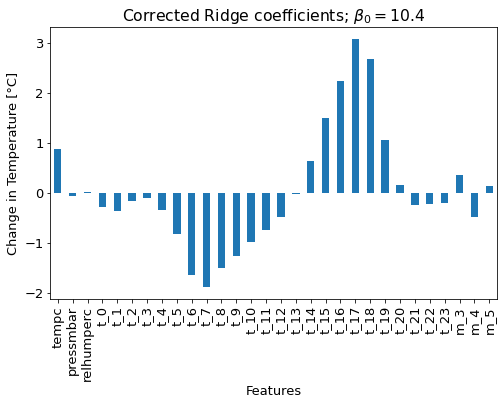

In [93]:
e = RidgeExperimentV4()
m = e.train_model()
ridge = m.steps[-1][1]
features = e.load_data()[0].columns
features = ['bias'] + features[:3].to_list() + features[3:3+24].map('t_{}'.format).to_list() + features[3+24:].map('m_{}'.format).to_list()
scaler = m.steps[0][1].transformers_[0][1]
# pd.DataFrame([ridge.intercept_] + ridge.coef_.tolist(), index=features).plot.bar(legend=False, title="Raw Ridge coefficients", xlabel="Features", ylabel="Change in Temperature [°C]")
# pd.DataFrame([ridge.intercept_] + (ridge.coef_[:3] / scaler.scale_[:3]).tolist() + ridge.coef_.tolist()[3:], index=features).plot.bar(legend=False, title="Ridge coefficients", xlabel="Features", ylabel="Change in Temperature [°C]")
# pd.DataFrame((ridge.coef_[:3] / scaler.scale_[:3]).tolist() + ridge.coef_.tolist()[3:], index=features[1:]).plot.bar(legend=False, title="Corrected Ridge coefficients", xlabel="Features", ylabel="Change in Temperature [°C]")

# Plot for report
plt.rcParams.update({'font.size': 13})
pd.DataFrame((ridge.coef_[:3] / scaler.scale_[:3]).tolist() + ridge.coef_.tolist()[3:], index=features[1:]).plot.bar(legend=False, title=f"Corrected Ridge coefficients; $\\beta_0 = {ridge.intercept_:.1f}$", xlabel="Features", ylabel="Change in Temperature [°C]", figsize=(8,5))
plt.savefig("ridge_coef.pdf", bbox_inches='tight')

In [12]:
folds, summary = run_experiment(RidgeExperimentV1())
folds

RidgeExperimentV1: ridge regression using basic weather data(tempc, pressmbar, relhumperc)
===Parameters==
{'device_serials': [8, 1, 9, 11, 10, 3, 7, 5, 12, 13],
 'model_params': {'alpha': 1.0,
                  'copy_X': True,
                  'fit_intercept': True,
                  'max_iter': None,
                  'normalize': 'deprecated',
                  'positive': False,
                  'random_state': 0,
                  'solver': 'auto',
                  'tol': 0.001},
 'n_splits': 10,
 'random_seed': 0}
Loading data...DONE
Loading results from: /content/data/v1/experiments/RidgeExperimentV1.dump
Saved results to: /content/data/v1/experiments/RidgeExperimentV1.dump
===Fold mean====
MSE                      6.692358
MedAE                    1.776156
n_thresh_error_1         0.716409
n_thresh_error_3         0.225944
n_thresh_error_5         0.051257
MSE_d7                  10.657866
MedAE_d7                 1.955742
n_thresh_error_1_d7      0.746336
n_thresh_error_3_d

,Train_start,Train_end,Train_support,Test_start,Test_end,Test_support,MSE,MSE_SE,MSE_CI_lo,MSE_CI_hi,MedAE,MedAE_SE,MedAE_CI_lo,MedAE_CI_hi,n_thresh_error_1,n_thresh_error_3,n_thresh_error_5,d7_support,MSE_d7,MedAE_d7,n_thresh_error_1_d7,n_thresh_error_3_d7,n_thresh_error_5_d7,d1_support,MSE_d1,MedAE_d1,n_thresh_error_1_d1,n_thresh_error_3_d1,n_thresh_error_5_d1,d12_support,MSE_d12,MedAE_d12,n_thresh_error_1_d12,n_thresh_error_3_d12,n_thresh_error_5_d12,d8_support,MSE_d8,MedAE_d8,n_thresh_error_1_d8,n_thresh_error_3_d8,n_thresh_error_5_d8,d3_support,MSE_d3,MedAE_d3,n_thresh_error_1_d3,n_thresh_error_3_d3,n_thresh_error_5_d3,d9_support,MSE_d9,MedAE_d9,n_thresh_error_1_d9,n_thresh_error_3_d9,n_thresh_error_5_d9,d11_support,MSE_d11,MedAE_d11,n_thresh_error_1_d11,n_thresh_error_3_d11,n_thresh_error_5_d11,d10_support,MSE_d10,MedAE_d10,n_thresh_error_1_d10,n_thresh_error_3_d10,n_thresh_error_5_d10,d5_support,MSE_d5,MedAE_d5,n_thresh_error_1_d5,n_thresh_error_3_d5,n_thresh_error_5_d5,d13_support,MSE_d13,MedAE_d13,n_thresh_error_1_d13,n_thresh_error_3_d13,n_thresh_error_5_d13
0,2022-03-15 00:00:25,2022-03-20 04:31:19,22115,2022-03-20 04:36:58,2022-03-26 02:33:52,22092,10.401916,0.501235,9.764481,11.518321,2.267557,0.012770,2.242079,2.291344,0.824507,0.326272,0.105061,1078,20.659877,2.568189,0.873840,0.395176,0.218924,2016,8.484858,2.203210,0.803075,0.305556,0.090774,2293,11.326896,2.353283,0.850414,0.333188,0.120366,3150,14.821140,2.589513,0.848254,0.405397,0.134603,1608,7.292303,1.821105,0.766791,0.239428,0.083333,4196,8.714607,2.353934,0.839847,0.350095,0.069113,2542,8.267836,2.223025,0.800157,0.325334,0.079858,2292,7.767590,1.968641,0.776178,0.245201,0.100349,1797,11.260669,2.139262,0.851976,0.298831,0.131886,1120,9.299160,2.202904,0.831250,0.308036,0.096429
1,2022-03-15 00:00:25,2022-03-26 02:33:52,44221,2022-03-26 02:39:33,2022-03-31 06:43:32,22090,9.048887,0.090373,8.864934,9.228866,1.736473,0.014227,1.710295,1.763316,0.711453,0.267134,0.123766,1468,13.744219,2.097545,0.782016,0.337875,0.191417,1763,8.138335,1.747767,0.708452,0.254112,0.102099,2013,9.586504,1.656063,0.675609,0.270243,0.143567,2748,10.097841,2.071802,0.798035,0.327875,0.134279,2207,8.343306,1.721445,0.682374,0.275940,0.114635,3676,6.777341,1.509977,0.674918,0.186888,0.092220,2227,8.315191,1.733859,0.716210,0.249214,0.094746,2001,8.539410,1.805623,0.720640,0.277861,0.107446,2458,10.546928,1.741580,0.689178,0.290073,0.159072,1529,8.804572,1.625306,0.685415,0.256377,0.134729
2,2022-03-15 00:00:25,2022-03-31 06:43:32,66327,2022-03-31 06:50:14,2022-04-05 11:22:01,22087,7.446280,0.051215,7.343419,7.552843,2.352243,0.010609,2.330480,2.370727,0.840177,0.289265,0.036130,1473,10.205628,2.600669,0.866259,0.388323,0.095044,1762,6.121948,2.116155,0.823496,0.206583,0.018729,2015,8.167522,2.476767,0.872953,0.298759,0.038710,2753,7.178750,2.507459,0.834363,0.320378,0.025790,2205,5.978412,2.024354,0.780045,0.223583,0.007710,3667,6.871618,2.196573,0.827107,0.258795,0.029997,2226,9.020055,2.670083,0.893980,0.394429,0.069182,2000,7.666419,2.336533,0.841500,0.304500,0.035500,2457,7.149348,2.299848,0.838421,0.257631,0.034595,1529,7.238406,2.319578,0.842381,0.266187,0.025507
3,2022-03-15 00:00:25,2022-04-05 11:22:01,88433,2022-04-05 11:27:54,2022-04-10 19:44:53,22090,6.508425,0.288649,6.062145,7.132000,1.517813,0.011109,1.495277,1.539966,0.667723,0.212087,0.046673,1520,10.698644,1.460717,0.651974,0.269079,0.118421,1823,4.825393,1.457535,0.671969,0.188151,0.027976,2080,6.945564,1.485201,0.658654,0.221635,0.064423,2851,8.787277,1.558436,0.710979,0.215714,0.042792,2281,5.565632,1.587492,0.672512,0.215695,0.040333,3793,4.489891,1.539236,0.658318,0.177432,0.004218,2300,5.183491,1.376702,0.642609,0.210000,0.030000,2074,5.747446,1.411128,0.645612,0.196721,0.054484,2074,8.268913,1.652348,0.679846,0.247830,0.086307,1294,6.565578,1.568389,0.679289,0.221793,0.057960
4,2022-03-15 00:00:25,2022-04-10 19:44:53,110539,2022-04-10 19:50:58,2022-04-16 14:30:09,22091,7.651843,0.077508,7.505666,7.813867,1

In [13]:
folds, summary = run_experiment(RidgeExperimentV2())
folds

RidgeExperimentV2: ridge regression using basic weather data(tempc, pressmbar, relhumperc) + data normalization
===Parameters==
{'device_serials': [8, 1, 9, 11, 10, 3, 7, 5, 12, 13],
 'model_params': {'memory': None,
                  'ridge': Ridge(random_state=0),
                  'ridge__alpha': 1.0,
                  'ridge__copy_X': True,
                  'ridge__fit_intercept': True,
                  'ridge__max_iter': None,
                  'ridge__normalize': 'deprecated',
                  'ridge__positive': False,
                  'ridge__random_state': 0,
                  'ridge__solver': 'auto',
                  'ridge__tol': 0.001,
                  'standardscaler': StandardScaler(),
                  'standardscaler__copy': True,
                  'standardscaler__with_mean': True,
                  'standardscaler__with_std': True,
                  'steps': [('standardscaler', StandardScaler()),
                            ('ridge', Ridge(random_state=0))],
    

,Train_start,Train_end,Train_support,Test_start,Test_end,Test_support,MSE,MSE_SE,MSE_CI_lo,MSE_CI_hi,MedAE,MedAE_SE,MedAE_CI_lo,MedAE_CI_hi,n_thresh_error_1,n_thresh_error_3,n_thresh_error_5,d7_support,MSE_d7,MedAE_d7,n_thresh_error_1_d7,n_thresh_error_3_d7,n_thresh_error_5_d7,d1_support,MSE_d1,MedAE_d1,n_thresh_error_1_d1,n_thresh_error_3_d1,n_thresh_error_5_d1,d12_support,MSE_d12,MedAE_d12,n_thresh_error_1_d12,n_thresh_error_3_d12,n_thresh_error_5_d12,d8_support,MSE_d8,MedAE_d8,n_thresh_error_1_d8,n_thresh_error_3_d8,n_thresh_error_5_d8,d3_support,MSE_d3,MedAE_d3,n_thresh_error_1_d3,n_thresh_error_3_d3,n_thresh_error_5_d3,d9_support,MSE_d9,MedAE_d9,n_thresh_error_1_d9,n_thresh_error_3_d9,n_thresh_error_5_d9,d11_support,MSE_d11,MedAE_d11,n_thresh_error_1_d11,n_thresh_error_3_d11,n_thresh_error_5_d11,d10_support,MSE_d10,MedAE_d10,n_thresh_error_1_d10,n_thresh_error_3_d10,n_thresh_error_5_d10,d5_support,MSE_d5,MedAE_d5,n_thresh_error_1_d5,n_thresh_error_3_d5,n_thresh_error_5_d5,d13_support,MSE_d13,MedAE_d13,n_thresh_error_1_d13,n_thresh_error_3_d13,n_thresh_error_5_d13
0,2022-03-15 00:00:25,2022-03-20 04:31:19,22115,2022-03-20 04:36:58,2022-03-26 02:33:52,22092,10.402471,0.501291,9.764983,11.518983,2.268145,0.012763,2.242128,2.291816,0.824688,0.326317,0.105015,1078,20.660628,2.568625,0.874768,0.395176,0.218924,2016,8.485101,2.202921,0.803571,0.305556,0.090774,2293,11.327350,2.352704,0.850414,0.333188,0.120366,3150,14.822542,2.589622,0.848571,0.405397,0.134603,1608,7.293160,1.821955,0.766791,0.239428,0.083333,4196,8.714233,2.353871,0.840086,0.350334,0.069113,2542,8.268272,2.222895,0.800157,0.325334,0.079465,2292,7.768006,1.968505,0.776178,0.245201,0.100349,1797,11.261991,2.140151,0.851976,0.298831,0.131886,1120,9.300274,2.203904,0.831250,0.308036,0.096429
1,2022-03-15 00:00:25,2022-03-26 02:33:52,44221,2022-03-26 02:39:33,2022-03-31 06:43:32,22090,9.048696,0.090372,8.864750,9.228671,1.736321,0.014234,1.710250,1.763230,0.711453,0.267089,0.123721,1468,13.743594,2.097311,0.782016,0.337875,0.190736,1763,8.138243,1.747748,0.708452,0.254112,0.102099,2013,9.586305,1.656084,0.675609,0.270243,0.143567,2748,10.097766,2.071633,0.798035,0.327875,0.134279,2207,8.343167,1.721708,0.682374,0.275940,0.114635,3676,6.777157,1.509802,0.674918,0.186888,0.092220,2227,8.315025,1.733635,0.716210,0.249214,0.094746,2001,8.539277,1.805643,0.720640,0.277861,0.107446,2458,10.546682,1.741478,0.689178,0.289666,0.159072,1529,8.804367,1.625136,0.685415,0.256377,0.134729
2,2022-03-15 00:00:25,2022-03-31 06:43:32,66327,2022-03-31 06:50:14,2022-04-05 11:22:01,22087,7.446282,0.051215,7.343419,7.552846,2.352269,0.010608,2.330476,2.370718,0.840177,0.289310,0.036130,1473,10.205607,2.600592,0.866259,0.389002,0.095044,1762,6.121949,2.116123,0.823496,0.206583,0.018729,2015,8.167541,2.476815,0.872953,0.298759,0.038710,2753,7.178760,2.507388,0.834363,0.320378,0.025790,2205,5.978410,2.024379,0.780045,0.223583,0.007710,3667,6.871613,2.196655,0.827107,0.258795,0.029997,2226,9.020042,2.670048,0.893980,0.394429,0.069182,2000,7.666416,2.336497,0.841500,0.304500,0.035500,2457,7.149362,2.299802,0.838421,0.257631,0.034595,1529,7.238424,2.319549,0.842381,0.266187,0.025507
3,2022-03-15 00:00:25,2022-04-05 11:22:01,88433,2022-04-05 11:27:54,2022-04-10 19:44:53,22090,6.508366,0.288648,6.062090,7.131944,1.517827,0.011101,1.495288,1.540001,0.667678,0.212087,0.046673,1520,10.698429,1.460693,0.651974,0.269079,0.118421,1823,4.825365,1.457428,0.671969,0.188151,0.027976,2080,6.945489,1.485193,0.658654,0.221635,0.064423,2851,8.787278,1.558503,0.710979,0.215714,0.042792,2281,5.565602,1.587541,0.672512,0.215695,0.040333,3793,4.489847,1.539320,0.658054,0.177432,0.004218,2300,5.183415,1.376669,0.642609,0.210000,0.030000,2074,5.747360,1.411179,0.645612,0.196721,0.054484,2074,8.268860,1.652358,0.679846,0.247830,0.086307,1294,6.565522,1.568378,0.679289,0.221793,0.057960
4,2022-03-15 00:00:25,2022-04-10 19:44:53,110539,2022-04-10 19:50:58,2022-04-16 14:30:09,22091,7.651927,0.077509,7.505750,7.813953,1

In [14]:
folds, summary = run_experiment(RidgeExperimentV3())
folds

RidgeExperimentV3: ridge regression using basic weather data(tempc, pressmbar, relhumperc) + hour and month
===Parameters==
{'device_serials': [8, 1, 9, 11, 10, 3, 7, 5, 12, 13],
 'model_params': {'alpha': 1.0,
                  'copy_X': True,
                  'fit_intercept': True,
                  'max_iter': None,
                  'normalize': 'deprecated',
                  'positive': False,
                  'random_state': 0,
                  'solver': 'auto',
                  'tol': 0.001},
 'n_splits': 10,
 'random_seed': 0}
Loading data...DONE
Loading results from: /content/data/v1/experiments/RidgeExperimentV3.dump
Saved results to: /content/data/v1/experiments/RidgeExperimentV3.dump
===Fold mean====
MSE                     5.047890
MedAE                   1.440221
n_thresh_error_1        0.613874
n_thresh_error_3        0.163952
n_thresh_error_5        0.037499
MSE_d7                  6.305668
MedAE_d7                1.557560
n_thresh_error_1_d7     0.634977
n_thresh_

,Train_start,Train_end,Train_support,Test_start,Test_end,Test_support,MSE,MSE_SE,MSE_CI_lo,MSE_CI_hi,MedAE,MedAE_SE,MedAE_CI_lo,MedAE_CI_hi,n_thresh_error_1,n_thresh_error_3,n_thresh_error_5,d7_support,MSE_d7,MedAE_d7,n_thresh_error_1_d7,n_thresh_error_3_d7,n_thresh_error_5_d7,d1_support,MSE_d1,MedAE_d1,n_thresh_error_1_d1,n_thresh_error_3_d1,n_thresh_error_5_d1,d12_support,MSE_d12,MedAE_d12,n_thresh_error_1_d12,n_thresh_error_3_d12,n_thresh_error_5_d12,d8_support,MSE_d8,MedAE_d8,n_thresh_error_1_d8,n_thresh_error_3_d8,n_thresh_error_5_d8,d3_support,MSE_d3,MedAE_d3,n_thresh_error_1_d3,n_thresh_error_3_d3,n_thresh_error_5_d3,d9_support,MSE_d9,MedAE_d9,n_thresh_error_1_d9,n_thresh_error_3_d9,n_thresh_error_5_d9,d11_support,MSE_d11,MedAE_d11,n_thresh_error_1_d11,n_thresh_error_3_d11,n_thresh_error_5_d11,d10_support,MSE_d10,MedAE_d10,n_thresh_error_1_d10,n_thresh_error_3_d10,n_thresh_error_5_d10,d5_support,MSE_d5,MedAE_d5,n_thresh_error_1_d5,n_thresh_error_3_d5,n_thresh_error_5_d5,d13_support,MSE_d13,MedAE_d13,n_thresh_error_1_d13,n_thresh_error_3_d13,n_thresh_error_5_d13
0,2022-03-15 00:00:25,2022-03-20 04:31:19,22115,2022-03-20 04:36:58,2022-03-26 02:33:52,22092,3.659478,0.672190,2.918185,5.087858,1.085285,0.007237,1.072517,1.100135,0.539064,0.088629,0.006745,1078,5.446580,1.354164,0.624304,0.142857,0.054731,2016,2.719731,1.077095,0.534226,0.086310,0.003968,2293,3.302190,1.030014,0.520279,0.119930,0.017444,3150,8.286521,1.419634,0.634286,0.084762,0.001587,1608,2.029903,0.985414,0.486940,0.042910,0.000000,4196,2.782865,0.990818,0.496663,0.099142,0.001430,2542,2.591000,1.043657,0.517703,0.075138,0.001180,2292,2.820823,1.105292,0.558901,0.087260,0.000873,1797,2.872055,1.018033,0.509182,0.083472,0.013912,1120,2.377335,1.062858,0.525893,0.055357,0.000893
1,2022-03-15 00:00:25,2022-03-26 02:33:52,44221,2022-03-26 02:39:33,2022-03-31 06:43:32,22090,6.637410,0.077726,6.489436,6.795891,1.278901,0.009730,1.257494,1.299267,0.588366,0.198144,0.089679,1468,7.833532,1.469912,0.596730,0.243869,0.106948,1763,6.411904,1.277680,0.593307,0.194555,0.087918,2013,6.650554,1.235614,0.573770,0.197715,0.089916,2748,7.009236,1.543110,0.668122,0.183770,0.088064,2207,6.263915,1.331536,0.626189,0.187585,0.087902,3676,6.208852,1.175017,0.550598,0.195321,0.087867,2227,6.632786,1.123739,0.544230,0.192187,0.087562,2001,6.612921,1.252291,0.589205,0.205397,0.088956,2458,6.756495,1.279168,0.587063,0.205452,0.090724,1529,6.480245,1.177090,0.551995,0.194245,0.086985
2,2022-03-15 00:00:25,2022-03-31 06:43:32,66327,2022-03-31 06:50:14,2022-04-05 11:22:01,22087,14.165607,0.088079,14.000981,14.348761,3.297460,0.011436,3.274927,3.322892,0.861004,0.586091,0.170372,1473,16.067884,3.566507,0.894094,0.657162,0.200272,1762,13.240627,3.132672,0.834279,0.540295,0.167991,2015,14.380209,3.337619,0.887841,0.621340,0.163275,2753,14.206662,3.454863,0.853251,0.589539,0.153287,2205,12.389865,3.060217,0.835828,0.517914,0.136961,3667,14.215340,3.209622,0.850286,0.559585,0.186256,2226,16.287964,3.577040,0.880952,0.668014,0.223270,2000,14.304323,3.311915,0.852000,0.613000,0.177000,2457,13.185481,3.170303,0.868946,0.557998,0.142043,1529,13.787472,3.180233,0.870504,0.570307,0.154349
3,2022-03-15 00:00:25,2022-04-05 11:22:01,88433,2022-04-05 11:27:54,2022-04-10 19:44:53,22090,4.569217,0.308051,4.115831,5.363824,1.283995,0.008978,1.267068,1.300160,0.606836,0.124129,0.022544,1520,5.146892,1.374478,0.634868,0.153289,0.042763,1823,3.625838,1.228771,0.569391,0.083928,0.017005,2080,4.259841,1.272229,0.598077,0.127885,0.029327,2851,7.193621,1.425924,0.631007,0.134690,0.012627,2281,4.221761,1.336244,0.622972,0.121438,0.021043,3793,3.994932,1.243303,0.602689,0.117585,0.018982,2300,3.293657,1.121439,0.544348,0.074783,0.015652,2074,3.619775,1.189324,0.588235,0.085824,0.017358,2074,5.474633,1.376596,0.646095,0.206847,0.039537,1294,4.568407,1.306804,0.649150,0.157651,0.023957
4,2022-03-15 00:00:25,2022-04-10 19:44:53,110539,2022-04-10 19:50:58,2022-04-16 14:30:09,22091,5.112487,0.058476,5.002249,5.230095

In [6]:
folds, summary = run_experiment(RidgeExperimentV4())
folds

RidgeExperimentV4: Ridge regression using rolling window averaged basic weather data and one-hot hour & month.
===Parameters==
{'device_serials': [8, 1, 9, 11, 10, 3, 7, 5, 12, 13],
 'model_params': {'columntransformer': ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 slice(0, 3, None))]),
                  'columntransformer__n_jobs': None,
                  'columntransformer__remainder': 'passthrough',
                  'columntransformer__sparse_threshold': 0.3,
                  'columntransformer__standardscaler': StandardScaler(),
                  'columntransformer__standardscaler__copy': True,
                  'columntransformer__standardscaler__with_mean': True,
                  'columntransformer__standardscaler__with_std': True,
                  'columntransformer__transformer_weights': None,
                  'columntransformer__transformers': [('standardscaler',
          

,Train_start,Train_end,Train_support,Test_start,Test_end,Test_support,MSE,MSE_SE,MSE_CI_lo,MSE_CI_hi,MedAE,MedAE_SE,MedAE_CI_lo,MedAE_CI_hi,n_thresh_error_1,n_thresh_error_3,n_thresh_error_5,d7_support,MSE_d7,MedAE_d7,n_thresh_error_1_d7,n_thresh_error_3_d7,n_thresh_error_5_d7,d1_support,MSE_d1,MedAE_d1,n_thresh_error_1_d1,n_thresh_error_3_d1,n_thresh_error_5_d1,d12_support,MSE_d12,MedAE_d12,n_thresh_error_1_d12,n_thresh_error_3_d12,n_thresh_error_5_d12,d8_support,MSE_d8,MedAE_d8,n_thresh_error_1_d8,n_thresh_error_3_d8,n_thresh_error_5_d8,d3_support,MSE_d3,MedAE_d3,n_thresh_error_1_d3,n_thresh_error_3_d3,n_thresh_error_5_d3,d9_support,MSE_d9,MedAE_d9,n_thresh_error_1_d9,n_thresh_error_3_d9,n_thresh_error_5_d9,d11_support,MSE_d11,MedAE_d11,n_thresh_error_1_d11,n_thresh_error_3_d11,n_thresh_error_5_d11,d10_support,MSE_d10,MedAE_d10,n_thresh_error_1_d10,n_thresh_error_3_d10,n_thresh_error_5_d10,d5_support,MSE_d5,MedAE_d5,n_thresh_error_1_d5,n_thresh_error_3_d5,n_thresh_error_5_d5,d13_support,MSE_d13,MedAE_d13,n_thresh_error_1_d13,n_thresh_error_3_d13,n_thresh_error_5_d13
0,2022-03-15 00:00:25,2022-03-20 04:31:19,22115,2022-03-20 04:36:58,2022-03-26 02:33:52,22092,2.514971,0.024455,2.470073,2.565334,1.018402,0.006390,1.007291,1.031548,0.511452,0.081704,0.000453,1078,2.026908,1.001852,0.500928,0.046382,0.000000,2016,2.678594,1.021081,0.517361,0.092758,0.000992,2293,2.690653,1.030245,0.515482,0.095072,0.000872,3150,2.682635,1.027669,0.516190,0.093968,0.000635,1608,2.027816,0.989873,0.492537,0.049129,0.000000,4196,2.683714,1.031943,0.519066,0.094852,0.000477,2542,2.680130,1.034336,0.518883,0.091660,0.000393,2292,2.679078,1.031024,0.515707,0.091623,0.000436,1797,2.014014,0.990201,0.490818,0.045632,0.000000,1120,2.019299,0.989497,0.495536,0.046429,0.000000
1,2022-03-15 00:00:25,2022-03-26 02:33:52,44221,2022-03-26 02:39:33,2022-03-31 06:43:32,22090,8.856002,0.110568,8.635061,9.075452,1.284615,0.011930,1.260196,1.306861,0.601675,0.210729,0.125532,1468,8.860402,1.279607,0.601499,0.211853,0.125341,1763,8.864461,1.289028,0.598412,0.211004,0.125922,2013,8.824576,1.283246,0.599106,0.208644,0.123696,2748,8.851226,1.284040,0.604076,0.210699,0.124818,2207,8.875032,1.279797,0.601269,0.211146,0.126416,3676,8.843982,1.288676,0.600925,0.210283,0.125136,2227,8.852016,1.287487,0.600359,0.210148,0.126628,2001,8.885223,1.286897,0.603198,0.211894,0.125937,2458,8.875943,1.288929,0.604557,0.211961,0.125712,1529,8.828920,1.279002,0.602354,0.209941,0.126226
2,2022-03-15 00:00:25,2022-03-31 06:43:32,66327,2022-03-31 06:50:14,2022-04-05 11:22:01,22087,10.614760,0.065866,10.492562,10.758632,2.851308,0.009706,2.834102,2.874020,0.837733,0.452257,0.095305,1473,10.609486,2.859876,0.839104,0.452817,0.095723,1762,10.617520,2.843719,0.837684,0.451192,0.095346,2015,10.643561,2.853754,0.839206,0.453598,0.095782,2753,10.599817,2.852718,0.837995,0.451871,0.094079,2205,10.615432,2.850217,0.837642,0.451701,0.094331,3667,10.616069,2.851797,0.836924,0.452959,0.096264,2226,10.614162,2.848136,0.837826,0.451482,0.095687,2000,10.601507,2.854781,0.836000,0.454500,0.095000,2457,10.625241,2.854583,0.837607,0.451363,0.095238,1529,10.602859,2.852400,0.838457,0.450621,0.095487
3,2022-03-15 00:00:25,2022-04-05 11:22:01,88433,2022-04-05 11:27:54,2022-04-10 19:44:53,22090,3.050790,0.032234,2.984523,3.111216,1.137057,0.012126,1.115532,1.160182,0.549298,0.074287,0.008511,1520,3.008557,1.151875,0.552632,0.071053,0.007895,1823,3.033301,1.141035,0.552386,0.072408,0.008228,2080,3.029324,1.137812,0.549519,0.073077,0.008173,2851,3.014187,1.142845,0.549982,0.071554,0.008418,2281,3.015905,1.139403,0.549320,0.070145,0.007891,3793,3.011255,1.143285,0.549433,0.071975,0.008173,2300,3.025733,1.138871,0.550435,0.072174,0.008696,2074,3.024392,1.137405,0.549180,0.071842,0.008197,2074,3.225550,1.113496,0.541948,0.088235,0.010125,1294,3.224322,1.108506,0.548686,0.088099,0.010046
4,2022-03-15 00:00:25,2022-04-10 19:44:53,110539,2022-04-10 19:50:58,2022-04-16 14:30:09,22091,4.066108,0.045450,3.973083,4.153920

In [7]:
folds, summary = run_experiment(RidgeExperimentV5())
folds

RidgeExperimentV5: Ridge regression using rolling window averaged basic weather data and circular time.
===Parameters==
{'device_serials': [8, 1, 9, 11, 10, 3, 7, 5, 12, 13],
 'model_params': {'columntransformer': ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 slice(0, 3, None))]),
                  'columntransformer__n_jobs': None,
                  'columntransformer__remainder': 'passthrough',
                  'columntransformer__sparse_threshold': 0.3,
                  'columntransformer__standardscaler': StandardScaler(),
                  'columntransformer__standardscaler__copy': True,
                  'columntransformer__standardscaler__with_mean': True,
                  'columntransformer__standardscaler__with_std': True,
                  'columntransformer__transformer_weights': None,
                  'columntransformer__transformers': [('standardscaler',
                 

,Train_start,Train_end,Train_support,Test_start,Test_end,Test_support,MSE,MSE_SE,MSE_CI_lo,MSE_CI_hi,MedAE,MedAE_SE,MedAE_CI_lo,MedAE_CI_hi,n_thresh_error_1,n_thresh_error_3,n_thresh_error_5,d7_support,MSE_d7,MedAE_d7,n_thresh_error_1_d7,n_thresh_error_3_d7,n_thresh_error_5_d7,d1_support,MSE_d1,MedAE_d1,n_thresh_error_1_d1,n_thresh_error_3_d1,n_thresh_error_5_d1,d12_support,MSE_d12,MedAE_d12,n_thresh_error_1_d12,n_thresh_error_3_d12,n_thresh_error_5_d12,d8_support,MSE_d8,MedAE_d8,n_thresh_error_1_d8,n_thresh_error_3_d8,n_thresh_error_5_d8,d3_support,MSE_d3,MedAE_d3,n_thresh_error_1_d3,n_thresh_error_3_d3,n_thresh_error_5_d3,d9_support,MSE_d9,MedAE_d9,n_thresh_error_1_d9,n_thresh_error_3_d9,n_thresh_error_5_d9,d11_support,MSE_d11,MedAE_d11,n_thresh_error_1_d11,n_thresh_error_3_d11,n_thresh_error_5_d11,d10_support,MSE_d10,MedAE_d10,n_thresh_error_1_d10,n_thresh_error_3_d10,n_thresh_error_5_d10,d5_support,MSE_d5,MedAE_d5,n_thresh_error_1_d5,n_thresh_error_3_d5,n_thresh_error_5_d5,d13_support,MSE_d13,MedAE_d13,n_thresh_error_1_d13,n_thresh_error_3_d13,n_thresh_error_5_d13
0,2022-03-15 00:00:25,2022-03-20 04:31:19,22115,2022-03-20 04:36:58,2022-03-26 02:33:52,22092,8.750981,0.066185,8.622698,8.873224,2.366742,0.012839,2.337250,2.387558,0.775575,0.353160,0.079848,1078,8.224967,2.335665,0.796846,0.338590,0.065863,2016,8.915248,2.372771,0.767857,0.356647,0.085317,2293,8.984447,2.381231,0.769734,0.359355,0.084605,3150,8.953064,2.378764,0.769206,0.358413,0.086032,1608,8.201819,2.332204,0.795398,0.338308,0.064055,4196,8.928856,2.377682,0.770019,0.358198,0.085081,2542,8.941520,2.381184,0.768293,0.359166,0.085759,2292,8.911728,2.380386,0.767452,0.359948,0.084206,1797,8.180651,2.339200,0.794658,0.336116,0.063996,1120,8.190965,2.332603,0.793750,0.335714,0.062500
1,2022-03-15 00:00:25,2022-03-26 02:33:52,44221,2022-03-26 02:39:33,2022-03-31 06:43:32,22090,15.724809,0.168588,15.378338,16.052781,1.956376,0.011116,1.935786,1.978907,0.738660,0.299321,0.195699,1468,15.747530,1.967575,0.739101,0.297684,0.195504,1763,15.733138,1.952545,0.739648,0.299490,0.196256,2013,15.651351,1.950341,0.740189,0.298559,0.194237,2748,15.662895,1.956029,0.740175,0.299127,0.194687,2207,15.761486,1.960361,0.736747,0.301767,0.196194,3676,15.714134,1.954100,0.737758,0.298422,0.195593,2227,15.754361,1.955297,0.738662,0.299506,0.196228,2001,15.782450,1.961258,0.738631,0.300350,0.196402,2458,15.747457,1.965059,0.737998,0.299430,0.196094,1529,15.719213,1.955707,0.738391,0.298888,0.196207
2,2022-03-15 00:00:25,2022-03-31 06:43:32,66327,2022-03-31 06:50:14,2022-04-05 11:22:01,22087,9.176344,0.053241,9.078524,9.291286,2.680474,0.012283,2.661734,2.711387,0.809209,0.431702,0.052565,1473,9.162931,2.672467,0.809233,0.430414,0.052274,1762,9.171049,2.674582,0.809308,0.431896,0.053348,2015,9.198079,2.684985,0.809429,0.432754,0.052605,2753,9.175684,2.680795,0.809662,0.430803,0.052307,2205,9.174994,2.671032,0.809524,0.431293,0.053061,3667,9.176872,2.680474,0.809108,0.431688,0.052632,2226,9.174105,2.681403,0.807727,0.432615,0.051213,2000,9.172842,2.683689,0.810500,0.432500,0.053000,2457,9.178367,2.680131,0.806675,0.432234,0.051689,1529,9.173179,2.672168,0.812296,0.430347,0.054284
3,2022-03-15 00:00:25,2022-04-05 11:22:01,88433,2022-04-05 11:27:54,2022-04-10 19:44:53,22090,4.301559,0.038544,4.222227,4.370464,1.598986,0.008098,1.582824,1.613684,0.697782,0.111317,0.015980,1520,4.251070,1.597561,0.693421,0.109211,0.015132,1823,4.270422,1.588235,0.692265,0.108064,0.015359,2080,4.274701,1.597413,0.697596,0.111538,0.015385,2851,4.248789,1.595942,0.692038,0.108383,0.015433,2281,4.247974,1.589212,0.692240,0.107409,0.015344,3793,4.263002,1.594383,0.691537,0.109676,0.015819,2300,4.266113,1.592113,0.692609,0.108261,0.015217,2074,4.260690,1.597679,0.694311,0.109450,0.015429,2074,4.532465,1.627567,0.725169,0.123915,0.019286,1294,4.530056,1.624599,0.722566,0.124420,0.018547
4,2022-03-15 00:00:25,2022-04-10 19:44:53,110539,2022-04-10 19:50:58,2022-04-16 14:30:09,22091,5.724014,0.057243,5.612393,5.829250